<a href="https://colab.research.google.com/github/sanjana514/Research_Paper/blob/main/Retail_Store_Inventory_Forecasting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# **Load The dataset**

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "retail_store_inventory.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "anirudhchauhan/retail-store-inventory-forecasting-dataset",
  file_path,
)

print("First 5 records:")
df.head()

<ipython-input-2-68f0bdb30791>:6: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 5.90M/5.90M [00:00<00:00, 40.0MB/s]


First 5 records:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

## **Missing Values Check**

In [4]:
missing_values = df.isna().sum()
missing_values_percent = 100 * df.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Date                  0.0
Store ID              0.0
Product ID            0.0
Category              0.0
Region                0.0
Inventory Level       0.0
Units Sold            0.0
Units Ordered         0.0
Demand Forecast       0.0
Price                 0.0
Discount              0.0
Weather Condition     0.0
Holiday/Promotion     0.0
Competitor Pricing    0.0
Seasonality           0.0
dtype: float64
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


<ipython-input-5-557c9a2e8083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


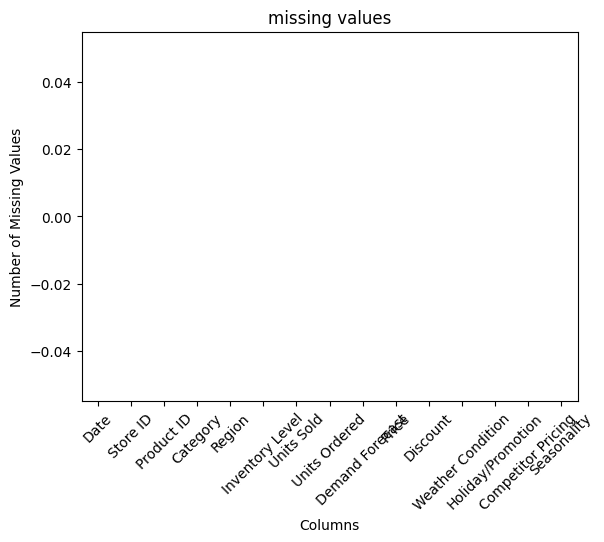

In [5]:
missing_counts = df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title("missing values")
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

## **Check and Remove Outliers**

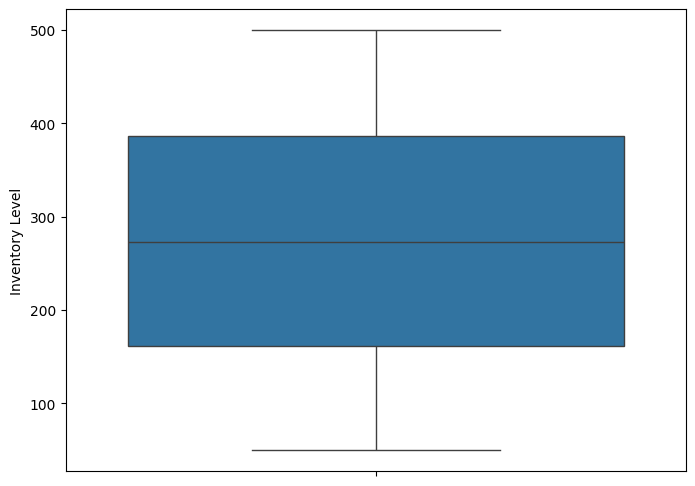

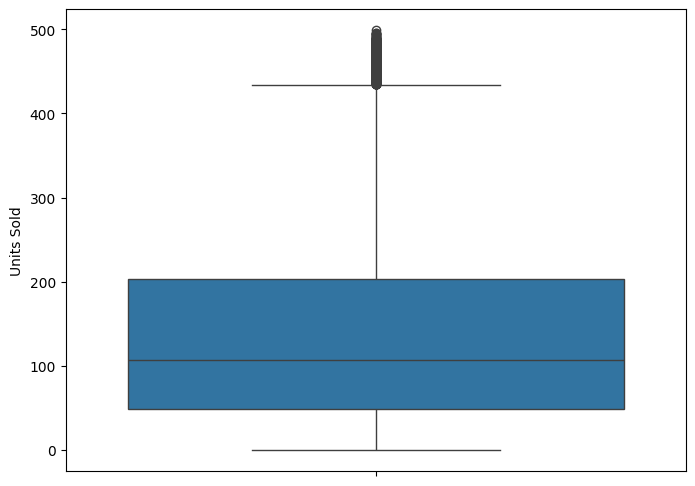

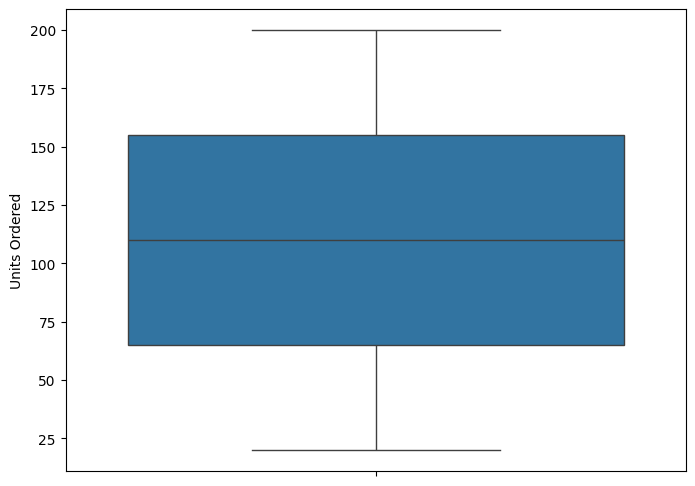

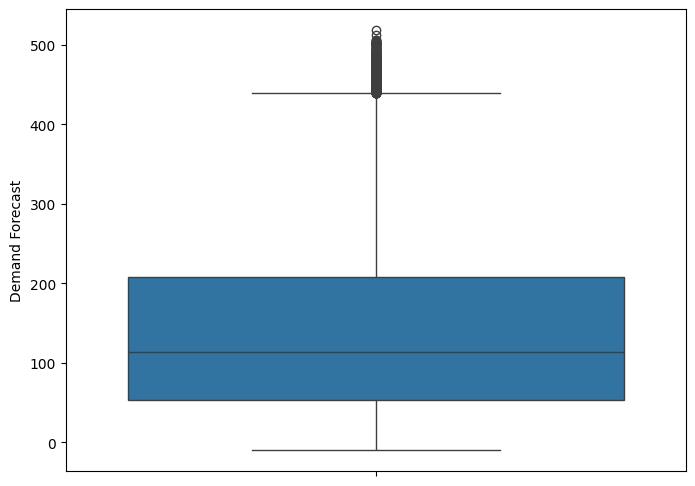

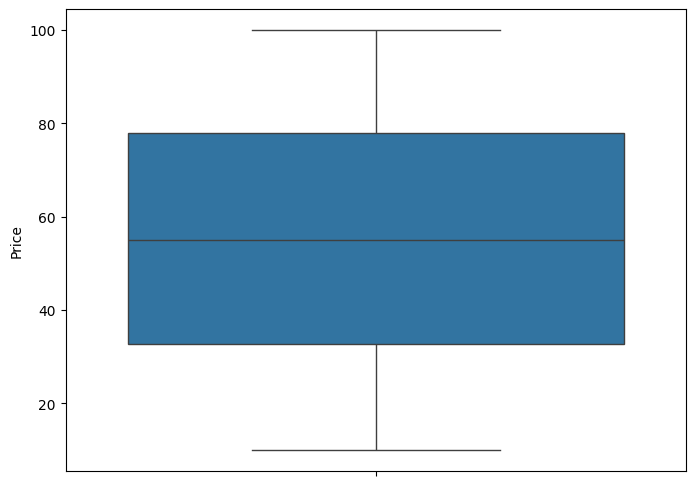

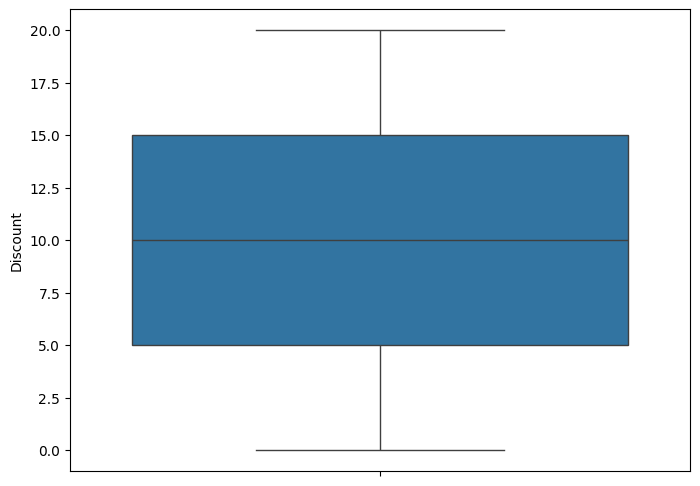

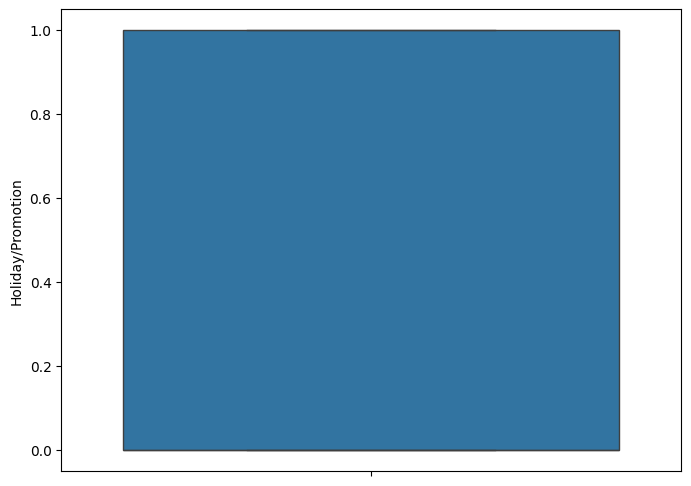

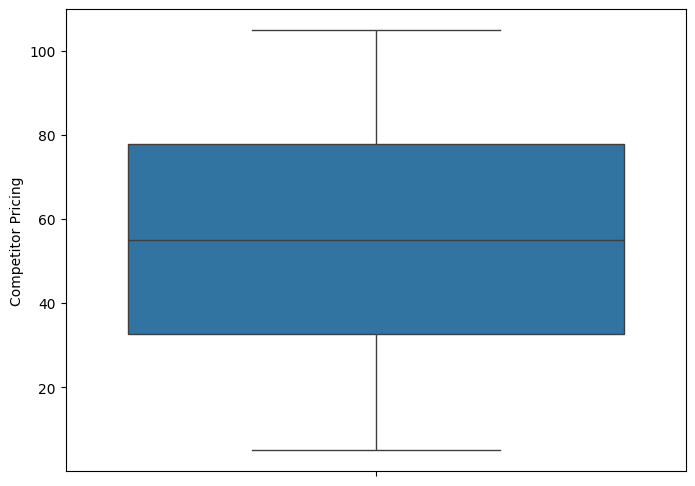

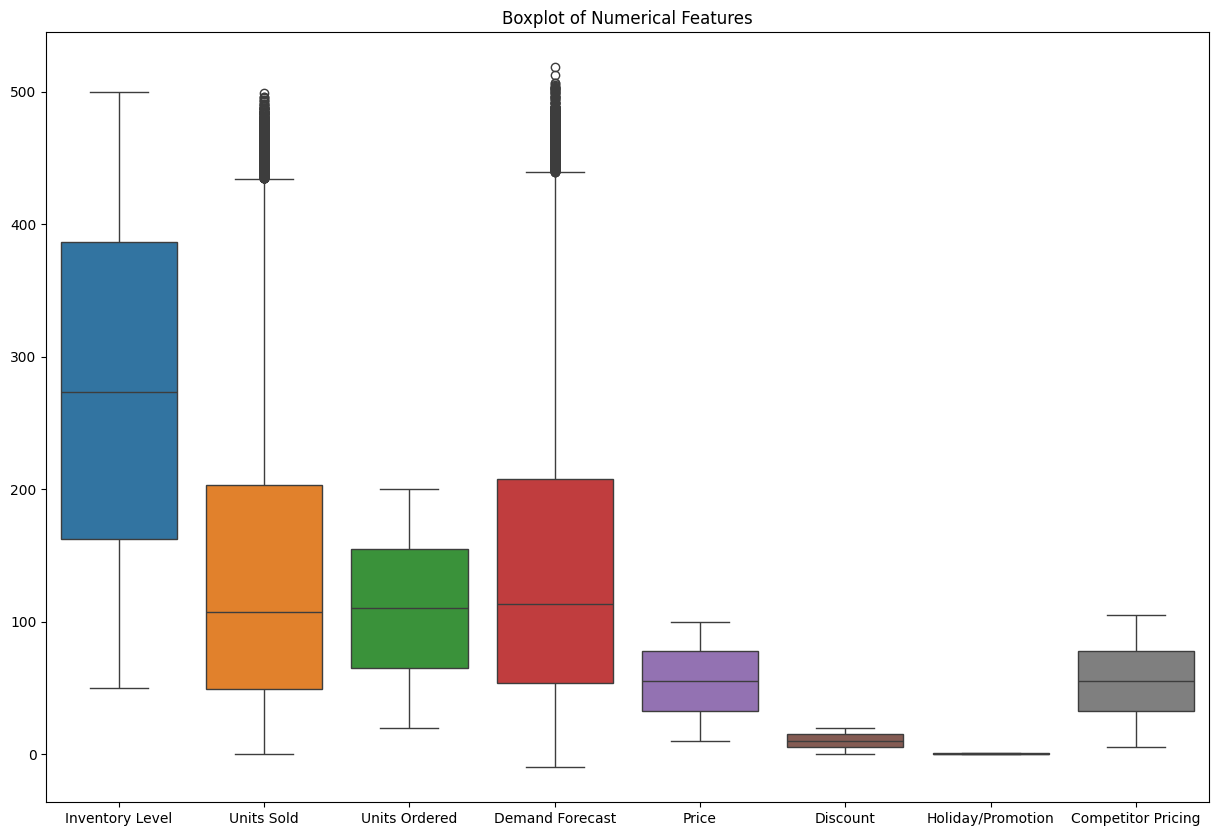

In [6]:
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

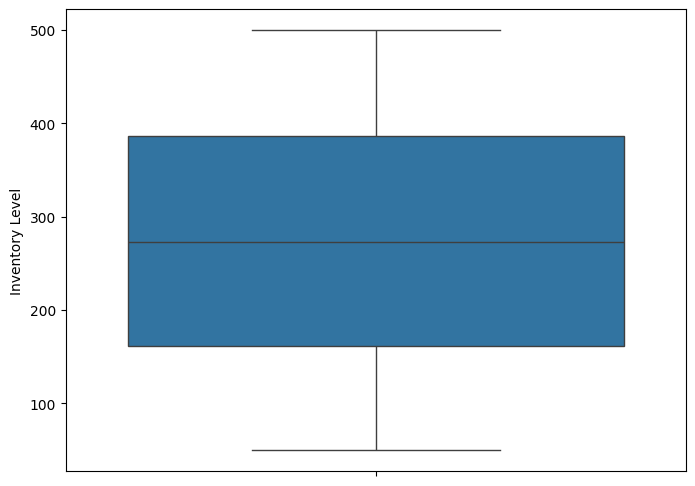

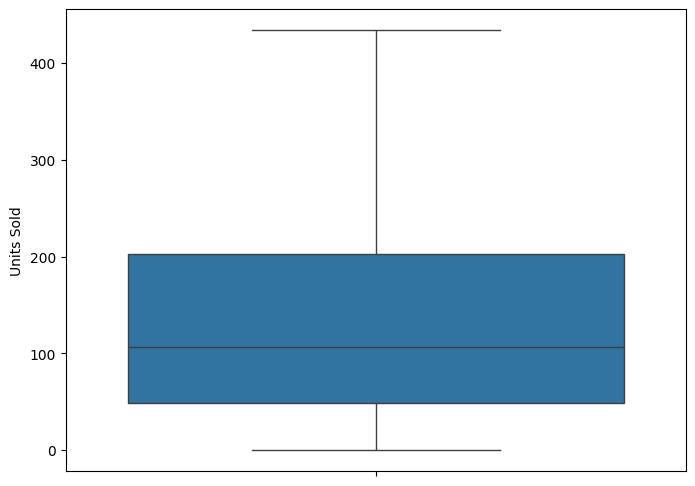

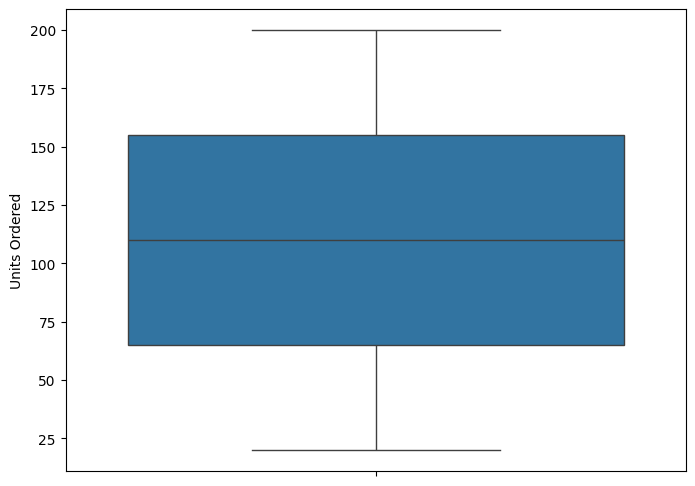

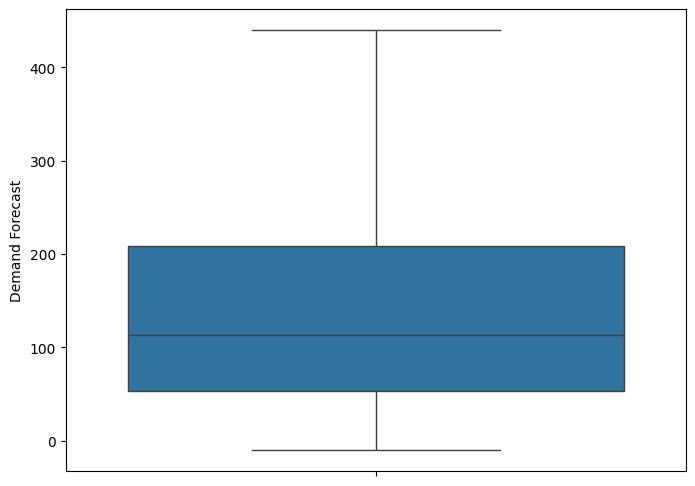

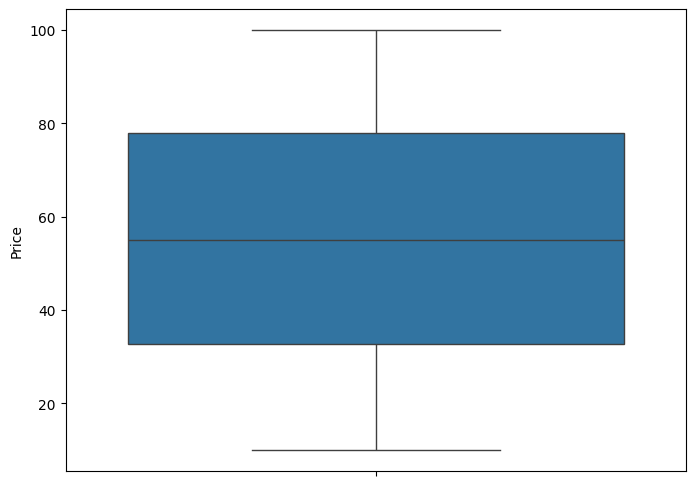

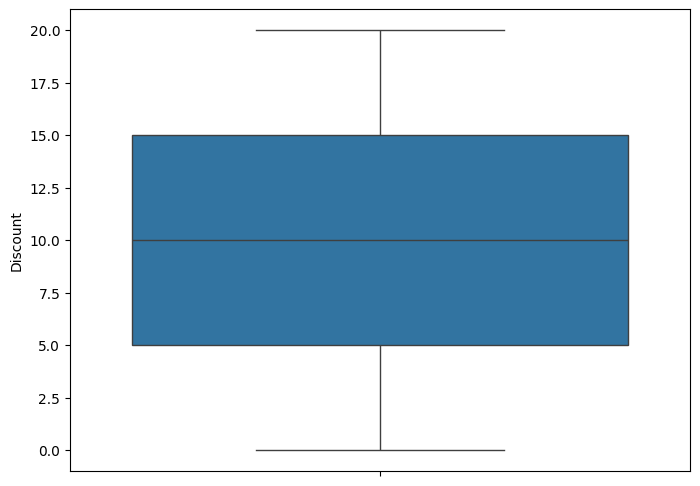

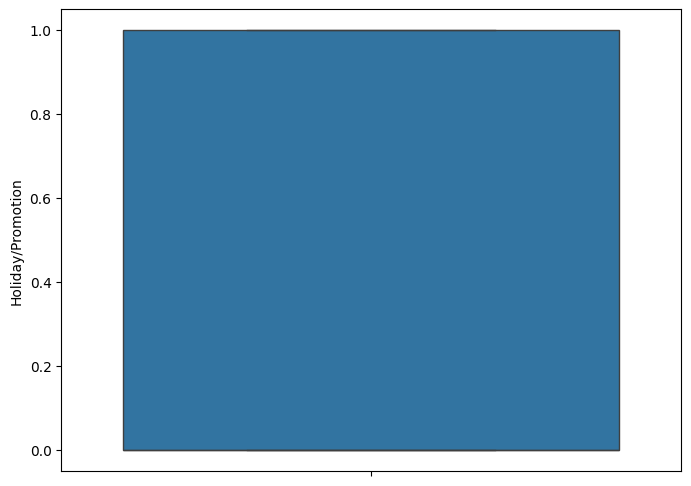

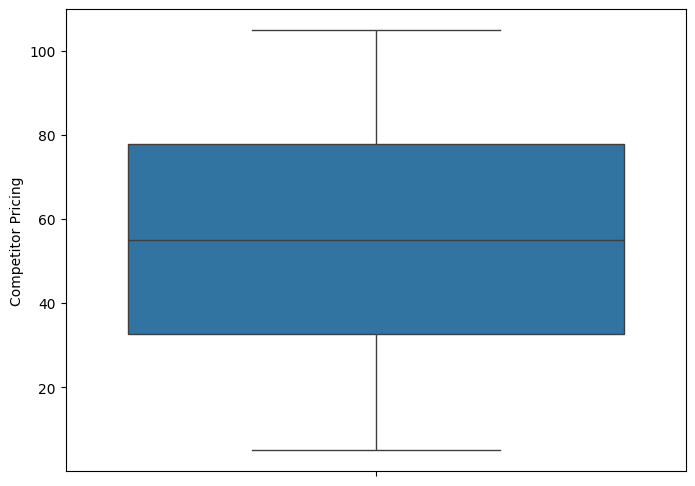

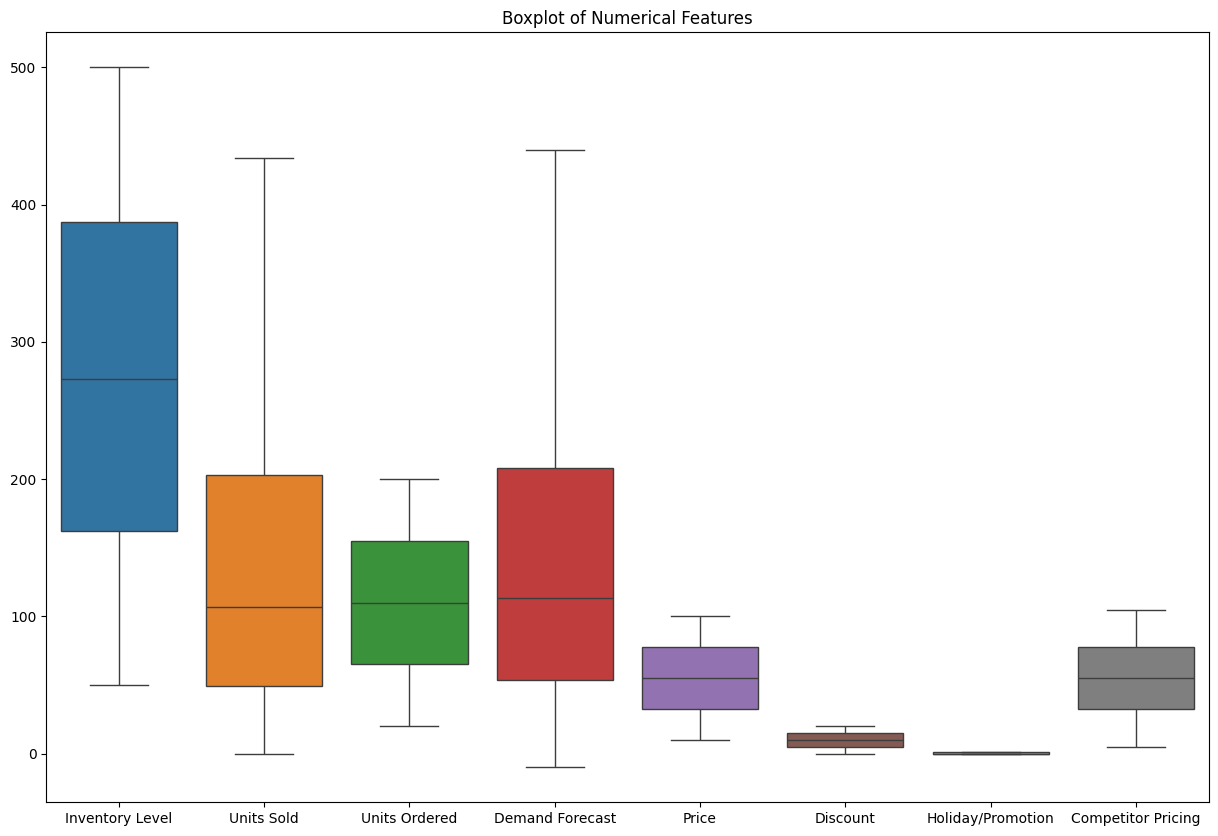

In [7]:
# Function to cap outliers using IQR (Interquartile Range)
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for acceptable values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper threshold
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List of columns from which to cap outliers
columns_to_cap_outliers = ['Units Sold', 'Demand Forecast']

# Assuming df_rename is your original DataFrame, apply the cap_outliers function
df_capped = cap_outliers(df, columns_to_cap_outliers)

# Display the first few rows of the capped DataFrame
print(df_capped.head())

# Generate individual boxplots for each column after capping outliers
for column in df_capped.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_capped[column])
    plt.show()

# Generate a combined boxplot for all selected columns after capping outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_capped.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()


# **Hypothesis Testing**

## **Hypothesis-1**
#### Null Hypothesis (H₀): There is no significant correlation between Inventory Level and Units Sold.
#### Alternative Hypothesis (H₁): There is a significant correlation between Inventory Level and Units Sold.
Method : Pearson Correlation

## **Hypothesis-2**
#### H₀: Higher discounts do not significantly increase Units Sold.
#### H₁: Higher discounts significantly increase Units Sold.
Method : T-Test

## **Hypothesis-3**
#### H₀: There is no significant increase in Sales during Holiday/Promotion periods.
#### H₁: Sales significantly increase during Holiday/Promotion periods.
Method : T-Test

## **Hypothesis-4**
#### H₀: Demand Forecast does not significantly differ across different regions.
#### H₁: Demand Forecast significantly differs across different regions.
Method : ANOVA test

## **Hypothesis-5**
#### H₀: Competitor Pricing has no significant impact on the product Price.
#### H₁: Competitor Pricing has a significant impact on the product Price.
Method : Linear Regression

## **Hypothesis-6**
#### H₀: Units Ordered do not vary significantly across different seasons.
#### H₁: Units Ordered vary significantly across different seasons.
Method : Kruskal-Wallis

## **Hypothesis-7**
#### H₀: Weather conditions do not affect the number of Units Sold.
#### H₁: Weather conditions significantly affect the number of Units Sold.
Method : Chi-Square Test

## **Hypothesis-8**
#### H₀: Demand Forecast accuracy does not differ based on Category.
#### H₁: Demand Forecast accuracy differs based on Category.
Method : RMSE Comparison (Root Mean Squared Error.)

## **Hypothesis-9**
#### H₀: Dynamic pricing strategies based on Demand Forecast do not improve revenue.
#### H₁: Dynamic pricing strategies based on Demand Forecast improve revenue.
Method : A/B Testing

## **Hypothesis-10**
#### H₀: The price of a product does not affect its sales volume.
#### H₁: High-priced products tend to have lower sales volume.
Method : Spearman Rank Correlation

## **Hypothesis-11**
#### H₀: There is no difference in sales between weekdays and weekends.
#### H₁: Sales increase on weekends.
Method : Wilcoxon Signed-Rank Test

## **Hypothesis-12**
#### H₀: The distribution of Prices is the same during and outside of Holiday/Promotion periods.
#### H₁: Price distributions differ significantly between Holiday/Promotion and normal days.
Method : Mann-Whitney U Test

## **Hypothesis-13**
#### H₀: The accuracy of Demand Forecast does not improve over time.
#### H₁: The accuracy of Demand Forecast improves over time.
Method : Mean Absolute Error (MAE)

## **Hypothesis-14**
#### H₀: Price Elasticity is not significant for product demand.
#### H₁: Price Elasticity significantly affects demand.
Method : Log-Log Regression Model

## **Hypothesis-15**
#### H₀: Sales variance is equal across different Stores.
#### H₁: Sales variance differs significantly across Stores.
Method : Levene’s Test

## **Hypothesis-1 (Pearson Correlation)**
H₀ : There is no significant correlation between Inventory Level and Units Sold.

H₁ : There is a significant correlation between Inventory Level and Units Sold.


In [8]:
!pip install scipy
import scipy.stats as stats

# Select the two columns
inventory = df_capped["Inventory Level"]
units_sold = df_capped["Units Sold"]

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(inventory, units_sold)

# Print results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Significant correlation exists.")
else:
    print("Fail to reject H₀: No significant correlation.")

Pearson Correlation Coefficient: 0.5901899467262202
P-value: 0.0
Reject H₀: Significant correlation exists.


## **Hypothesis-2 ( T-Test )**
H₀ : Higher discounts do not significantly increase Units Sold.

H₁ : Higher discounts significantly increase Units Sold.

In [9]:
from scipy.stats import ttest_ind
# Splitting data based on Discount levels
median_discount = df_capped["Discount"].median()
low_discount_group = df_capped[df_capped["Discount"] <= median_discount]["Units Sold"]
high_discount_group = df_capped[df_capped["Discount"] > median_discount]["Units Sold"]

# Perform T-Test
t_stat, p_value = ttest_ind(low_discount_group, high_discount_group, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Higher discounts significantly increase Units Sold.")
else:
    print("Fail to reject H₀: No significant effect of discount on Units Sold.")

T-Statistic: -0.3347645284016671
P-value: 0.7378038362568219
Fail to reject H₀: No significant effect of discount on Units Sold.


## **Hypothesis-3 ( T-test)**
H₀: There is no significant increase in Sales during Holiday/Promotion periods.

H₁: Sales significantly increase during Holiday/Promotion periods.


In [10]:
# Splitting data into two groups: Holiday/Promotion vs. Non-Holiday
holiday_sales = df_capped[df_capped["Holiday/Promotion"] == 1]["Units Sold"]
non_holiday_sales = df_capped[df_capped["Holiday/Promotion"] == 0]["Units Sold"]

# Perform Independent T-Test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Sales significantly increase during Holiday/Promotion periods.")
else:
    print("Fail to reject H₀: No significant increase in sales during Holiday/Promotion periods.")

T-Statistic: -0.06393788316138897
P-value: 0.949019862409233
Fail to reject H₀: No significant increase in sales during Holiday/Promotion periods.


## **Hypothesis-4 (ANOVA test)**
H₀: Demand Forecast does not significantly differ across different regions.

H₁: Demand Forecast significantly differs across different regions.


In [11]:
from scipy.stats import f_oneway

# Group Demand Forecast by Region
regions = df_capped["Region"].unique()  # Get all unique regions
demand_forecast_groups = [df_capped[df_capped["Region"] == region]["Demand Forecast"] for region in regions]

# Perform ANOVA Test
f_stat, p_value = f_oneway(*demand_forecast_groups)

# Print results
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Demand Forecast significantly differs across different regions.")
else:
    print("Fail to reject H₀: No significant difference in Demand Forecast across regions.")

F-Statistic: 0.6014816277995594
P-value: 0.6139703158996084
Fail to reject H₀: No significant difference in Demand Forecast across regions.


## **Hypothesis-5 ( Linear Regression)**
H₀: Competitor Pricing has no significant impact on the product Price.

H₁: Competitor Pricing has a significant impact on the product Price.


In [12]:
import statsmodels.api as sm
# Define independent (X) and dependent (Y) variables
X = df_capped["Competitor Pricing"]  # Independent variable
Y = df_capped["Price"]  # Dependent variable

# Add a constant (for the intercept)
X = sm.add_constant(X)

# Perform Linear Regression
model = sm.OLS(Y, X).fit()

# Print summary
print(model.summary())

# Extract p-value for Competitor Pricing
p_value = model.pvalues["Competitor Pricing"]

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Competitor Pricing has a significant impact on the product Price.")
else:
    print("Fail to reject H₀: Competitor Pricing has no significant impact on the product Price.")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 5.937e+06
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        08:04:05   Log-Likelihood:            -1.8079e+05
No. Observations:               73100   AIC:                         3.616e+05
Df Residuals:                   73098   BIC:                         3.616e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6801      0

## **Hypothesis-6 (Kruskal-Wallis)**
H₀: Units Ordered do not vary significantly across different seasons.

H₁: Units Ordered vary significantly across different seasons.


In [13]:
import pandas as pd
from scipy.stats import kruskal

# Group data by Season
season_groups = [group["Units Ordered"].dropna() for _, group in df_capped.groupby("Seasonality")]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*season_groups)

# Print results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Units Ordered vary significantly across different seasons.")
else:
    print("Fail to reject H₀: No significant variation in Units Ordered across seasons.")


Kruskal-Wallis Statistic: 1.9096579001004208
P-value: 0.591367580311708
Fail to reject H₀: No significant variation in Units Ordered across seasons.


## **Hypothesis-7 (Chi-Square Test)**
H₀: Weather conditions do not affect the number of Units Sold.

H₁: Weather conditions significantly affect the number of Units Sold.


In [14]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table (Weather Condition vs. Units Sold category)
df_capped["Units Sold Category"] = pd.qcut(df_capped["Units Sold"], q=3, labels=["Low", "Medium", "High"])  # Categorizing Units Sold
contingency_table = pd.crosstab(df_capped["Weather Condition"], df_capped["Units Sold Category"])
print(contingency_table)

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Weather conditions significantly affect the number of Units Sold.")
else:
    print("Fail to reject H₀: Weather conditions do not significantly affect the number of Units Sold.")


Units Sold Category   Low  Medium  High
Weather Condition                      
Cloudy               6086    6096  6078
Rainy                6219    6046  6013
Snowy                6249    6043  5980
Sunny                6089    6049  6152
Chi-Square Statistic: 6.704477856336725
P-value: 0.3490434498815707
Fail to reject H₀: Weather conditions do not significantly affect the number of Units Sold.


## **Hypothesis-8 (RMSE Comparison)**
H₀: Demand Forecast accuracy does not differ based on Category.

H₁: Demand Forecast accuracy differs based on Category.


In [15]:
# Calculate RMSE for each Category
rmse_values = {}
for category, group in df_capped.groupby("Category"):
    actual = group["Units Sold"]
    forecasted = group["Demand Forecast"]
    rmse = np.sqrt(((actual - forecasted) ** 2).mean())  # RMSE formula
    rmse_values[category] = rmse

# Print RMSE values for each category
print("RMSE for each Category:")
for category, rmse in rmse_values.items():
    print(f"{category}: {rmse}")

# Interpretation: Higher RMSE means lower accuracy in that category.
# Prepare RMSE groups for statistical testing
rmse_groups = [group["Units Sold"] - group["Demand Forecast"] for _, group in df_capped.groupby("Category")]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*rmse_groups)

# Print results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Forecast accuracy differs significantly across categories.")
else:
    print("Fail to reject H₀: No significant difference in forecast accuracy across categories.")



RMSE for each Category:
Clothing: 9.990197635756303
Electronics: 9.9175781857612
Furniture: 9.988970609222683
Groceries: 9.96564792709043
Toys: 10.021323569380197
Kruskal-Wallis Statistic: 2.4303716388166827
P-value: 0.6571456943705474
Fail to reject H₀: No significant difference in forecast accuracy across categories.


## **Hypothesis-9 (A/B Testing)**
H₀: Dynamic pricing strategies based on Demand Forecast do not improve revenue.

H₁: Dynamic pricing strategies based on Demand Forecast improve revenue.


In [16]:
# Define groups
group_A = df_capped[df_capped["Price"] == df_capped["Competitor Pricing"]]["Units Sold"]  # Regular Pricing
group_B = df_capped[df_capped["Price"] != df_capped["Competitor Pricing"]]["Units Sold"]  # Dynamic Pricing

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Dynamic Pricing significantly improves revenue.")
else:
    print("Fail to reject H₀: No significant improvement in revenue.")

T-Statistic: 0.07700925635170948
P-value: 0.938867794631469
Fail to reject H₀: No significant improvement in revenue.


## **Hypothesis-10 (Spearman Rank Correlation)**
H₀: The price of a product does not affect its sales volume.

H₁: High-priced products tend to have lower sales volume.


In [17]:
from scipy.stats import spearmanr

prices = df_capped["Price"]
sales = df_capped["Units Sold"]

# Perform Spearman correlation test
correlation, p_value = spearmanr(prices, sales)

# Print results
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Price significantly affects sales volume.")
else:
    print("Fail to reject H₀: No significant relationship between price and sales.")


Spearman Correlation Coefficient: 6.075634768726546e-05
P-value: 0.9868942025327657
Fail to reject H₀: No significant relationship between price and sales.


## **Hypothesis-11 (Wilcoxon Signed-Rank Test)**
H₀: There is no difference in sales between weekdays and weekends.

H₁: Sales increase on weekends.


In [18]:
from scipy.stats import wilcoxon

# Convert 'Date' to datetime format if not already
df_capped["Date"] = pd.to_datetime(df_capped["Date"])

# Extract weekdays (Monday-Friday) and weekends (Saturday-Sunday)
df_capped["Day"] = df_capped["Date"].dt.dayofweek  # Monday=0, Sunday=6

weekday_sales = df_capped[df_capped["Day"] < 5]["Units Sold"]
weekend_sales = df_capped[df_capped["Day"] >= 5]["Units Sold"]

# Perform Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(weekday_sales[:len(weekend_sales)], weekend_sales)

# Print results
print(f"Wilcoxon Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Sales significantly increase on weekends.")
else:
    print("Fail to reject H₀: No significant difference in sales between weekdays and weekends.")


Wilcoxon Statistic: 108771426.0
P-value: 0.3404495890568079
Fail to reject H₀: No significant difference in sales between weekdays and weekends.


## **Hypothesis-12 (Mann-Whitney U Test)**
H₀: The distribution of Prices is the same during and outside of Holiday/Promotion periods.

H₁: Price distributions differ significantly between Holiday/Promotion and normal days.




In [19]:
from scipy.stats import mannwhitneyu

# Split data into Holiday/Promotion and Normal days
holiday_prices = df_capped[df_capped["Holiday/Promotion"] == 1]["Price"]
normal_prices = df_capped[df_capped["Holiday/Promotion"] == 0]["Price"]

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(holiday_prices, normal_prices)

# Print results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Price distributions significantly differ during Holiday/Promotion periods.")
else:
    print("Fail to reject H₀: No significant difference in price distributions.")


Mann-Whitney U Statistic: 669718811.5
P-value: 0.5310409631280744
Fail to reject H₀: No significant difference in price distributions.


## **Hypothesis-13 (MAE)**
H₀: The accuracy of Demand Forecast does not improve over time.

H₁: The accuracy of Demand Forecast improves over time.


In [20]:
from sklearn.metrics import mean_absolute_error

# Sort data by Date
df_capped["Date"] = pd.to_datetime(df_capped["Date"])
df_capped = df_capped.sort_values("Date")

# Calculate MAE for the first and last 6 months
first_half = df_capped[df_capped["Date"] < df_capped["Date"].median()]
second_half = df_capped[df_capped["Date"] >= df_capped["Date"].median()]

mae_first = mean_absolute_error(first_half["Units Sold"], first_half["Demand Forecast"])
mae_second = mean_absolute_error(second_half["Units Sold"], second_half["Demand Forecast"])

# Print results
print(f"MAE (First Half): {mae_first}")
print(f"MAE (Second Half): {mae_second}")

# Interpretation
if mae_second < mae_first:
    print("Reject H₀: Forecast accuracy has improved over time.")
else:
    print("Fail to reject H₀: No significant improvement in forecast accuracy.")


MAE (First Half): 8.289878150684931
MAE (Second Half): 8.322941325136613
Fail to reject H₀: No significant improvement in forecast accuracy.


## **Hypothesis-14 ( Log-Log Regression Model)**
H₀: Price Elasticity is not significant for product demand.

H₁: Price Elasticity significantly affects demand.




In [21]:
import statsmodels.api as sm

# Convert to log scale
df_capped["log_price"] = np.log(df_capped["Price"])
df_capped["log_units_sold"] = np.log(df_capped["Units Sold"])

# Perform log-log regression
X = sm.add_constant(df_capped["log_price"])
y = df_capped["log_units_sold"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation
if model.pvalues["log_price"] < 0.05:
    print("Reject H₀: Price Elasticity significantly affects demand.")
else:
    print("Fail to reject H₀: Price Elasticity is not significant for product demand.")


                            OLS Regression Results                            
Dep. Variable:         log_units_sold   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 22 Feb 2025   Prob (F-statistic):                nan
Time:                        08:04:06   Log-Likelihood:                    nan
No. Observations:               73100   AIC:                               nan
Df Residuals:                   73098   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1733: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


## **Hypothesis-15 ( Levene’s Test)**
H₀: Sales variance is equal across different Stores.

H₁: Sales variance differs significantly across Stores.


In [22]:
from scipy.stats import levene

# Group sales data by store
stores = df_capped.groupby("Store ID")["Units Sold"].apply(list)

# Perform Levene’s test
stat, p_value = levene(*stores)

# Print results
print(f"Levene’s Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Sales variance differs significantly across Stores.")
else:
    print("Fail to reject H₀: Sales variance is equal across Stores.")


Levene’s Test Statistic: 1.6337800926686756
P-value: 0.16260354213686695
Fail to reject H₀: Sales variance is equal across Stores.


In [23]:
df_capped.head(30)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Units Sold Category,Day,log_price,log_units_sold
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Medium,5,3.511545,4.844187
72,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,0,Sunny,0,63.92,Autumn,Low,5,4.124065,4.025352
71,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,5,Rainy,1,18.56,Spring,Low,5,2.656757,2.197225
70,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,0,Sunny,1,57.76,Spring,Low,5,4.004420,3.828641
69,2022-01-01,S004,P0010,Groceries,East,447,104,96,115.03,33.48,15,Cloudy,0,37.15,Summer,Medium,5,3.510948,4.644391
68,2022-01-01,S004,P0009,Furniture,North,63,40,73,51.78,59.23,10,Rainy,1,61.10,Summer,Low,5,4.081428,3.688879
67,2022-01-01,S004,P0008,Furniture,South,250,51,137,54.98,85.88,20,Snowy,1,86.14,Winter,Low,5,4.452951,3.931826
66,2022-01-01,S004,P0007,Electronics,West,264,190,139,197.45,67.26,20,Cloudy,0,64.78,Summer,High,5,4.208566,5.247024
65,2022-01-01,S004,P0006,Electronics,East,470,382,195,396.40,41.35,10,Snowy,0,39.86,Summer,High,5,3.722072,5.945421
64,2022-01-01,S004,P0005,Groceries,North,397,200,172,196.57,81.72,0,Snowy,1,85.22,Spring,High,5,4.403299,5.298317


# **Challange 1. Time Series Demand Forecasting**

1.  Feature Engineering
2.  Null values Fillup, Outliers Removal
3.  Scaling the numerical values
4.  Label Encoding Categorical values
5.  Train Test Split
6.  Model Train

*    ARIMA
*    XGBoost
*    LSTM

7.  HyperParameter Tuning
8.  X-AI

*   SHAP
*   LIME




## 1. Feature Engineering

In [24]:
!pip install shap lime prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=40ddf80ea3d36cccf04370abee0f506ca8e0a3ba1c645710cce00519f4ad03c2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [26]:
# Convert Date column to datetime format & sort by time
df_capped["Date"] = pd.to_datetime(df_capped["Date"])
df = df_capped.sort_values(by=["Store ID", "Product ID", "Date"])

# ------------------ Step 2: Feature Engineering ------------------

# Time-based features
df["day_of_week"] = df["Date"].dt.dayofweek
df["month"] = df["Date"].dt.month
df["week_of_year"] = df["Date"].dt.isocalendar().week
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features (Past Sales Data)
df["sales_lag_1"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(1)
df["sales_lag_7"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(7)
df["sales_lag_30"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].shift(30)

# Rolling Window Features (Trends)
df["sales_ma_7"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].transform(lambda x: x.rolling(7).mean())
df["sales_ma_30"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].transform(lambda x: x.rolling(30).mean())
df["sales_rolling_std_7"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].transform(lambda x: x.rolling(7).std())
df["sales_rolling_std_30"] = df.groupby(["Store ID", "Product ID"])["Units Sold"].transform(lambda x: x.rolling(30).std())

# External Features
df["discount_percentage"] = df["Discount"] / df["Price"]
df["competitor_price_diff"] = df["Competitor Pricing"] - df["Price"]


df.dropna(inplace=True)

In [27]:
df.head(30)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,is_weekend,sales_lag_1,sales_lag_7,sales_lag_30,sales_ma_7,sales_ma_30,sales_rolling_std_7,sales_rolling_std_30,discount_percentage,competitor_price_diff
3000,2022-01-31,S001,P0001,Clothing,West,410,200,152,212.24,70.78,...,0,130.0,9.0,127.0,125.142857,116.666667,63.127988,92.498027,0.000000,-1.90
3100,2022-02-01,S001,P0001,Groceries,East,419,279,84,297.26,34.49,...,0,200.0,189.0,81.0,138.000000,123.266667,84.011904,96.827943,0.000000,-0.64
3200,2022-02-02,S001,P0001,Electronics,South,415,38,149,53.13,52.49,...,0,279.0,49.0,5.0,136.428571,124.366667,86.032663,95.617948,0.095256,-4.24
3300,2022-02-03,S001,P0001,Clothing,South,345,71,186,84.02,27.71,...,0,38.0,164.0,58.0,123.142857,124.800000,88.218344,95.335849,0.721761,1.25
3400,2022-02-04,S001,P0001,Furniture,South,121,25,25,37.72,16.84,...,0,71.0,97.0,147.0,112.857143,120.733333,95.658121,96.944681,0.890736,-4.31
3500,2022-02-05,S001,P0001,Groceries,South,458,350,182,362.43,51.44,...,1,25.0,47.0,37.0,156.142857,131.166667,124.957898,104.194144,0.291602,0.10
3600,2022-02-06,S001,P0001,Electronics,North,167,69,92,81.06,68.85,...,1,350.0,130.0,107.0,147.428571,129.900000,129.141856,104.727676,0.072622,2.97
3700,2022-02-07,S001,P0001,Electronics,South,244,62,105,73.41,11.34,...,0,69.0,200.0,2.0,127.714286,131.900000,130.306964,102.755267,0.440917,-1.71
3800,2022-02-08,S001,P0001,Toys,West,140,12,48,15.60,67.64,...,0,62.0,279.0,350.0,89.571429,120.633333,117.045372,96.347247,0.147842,1.48
3900,2022-02-09,S001,P0001,Groceries,South,209,16,143,22.37,90.55,...,0,12.0,38.0,36.0,86.428571,119.966667,118.940962,97.019900,0.000000,-0.35


## 2. Null values Fillup, Outliers Removal


*   Finding Missing Values
*   Filling the missing values
*   Detect Outliers
*   Remove Outliers



In [28]:
missing_values = df.isna().sum()
missing_values_percent = 100 * df.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Date                     0.0
Store ID                 0.0
Product ID               0.0
Category                 0.0
Region                   0.0
Inventory Level          0.0
Units Sold               0.0
Units Ordered            0.0
Demand Forecast          0.0
Price                    0.0
Discount                 0.0
Weather Condition        0.0
Holiday/Promotion        0.0
Competitor Pricing       0.0
Seasonality              0.0
Units Sold Category      0.0
Day                      0.0
log_price                0.0
log_units_sold           0.0
day_of_week              0.0
month                    0.0
week_of_year             0.0
is_weekend               0.0
sales_lag_1              0.0
sales_lag_7              0.0
sales_lag_30             0.0
sales_ma_7               0.0
sales_ma_30              0.0
sales_rolling_std_7      0.0
sales_rolling_std_30     0.0
discount_percentage      0.0
competitor_price_diff    0.0
dtype: float64
Date                     0
Store ID                 0
Pro

In [29]:
# # Assuming df is already loaded and contains lag features
# lag_features = ["sales_lag_1", "sales_lag_7", "sales_lag_30"]

# # Forward fill missing values within each Store-Product group
# df[lag_features] = df.groupby(["Store ID", "Product ID"])[lag_features].fillna(method="ffill")

# # If any missing values remain (e.g., at the start), fill with group mean
# for feature in lag_features:
#     df[feature].fillna(df.groupby(["Store ID", "Product ID"])[feature].transform("mean"), inplace=True)

# # If there are still NaNs (e.g., new products with no history), fill with 0
# df[lag_features] = df[lag_features].fillna(0)

# print("Missing values for lag features handled successfully!")

# # Fill rolling averages with median values
# df["sales_ma_7"].fillna(df.groupby(["Store ID", "Product ID"])["sales_ma_7"].transform("median"), inplace=True)
# df["sales_ma_30"].fillna(df.groupby(["Store ID", "Product ID"])["sales_ma_30"].transform("median"), inplace=True)
# df["sales_rolling_std_7"].fillna(df.groupby(["Store ID", "Product ID"])["sales_rolling_std_7"].transform("median"), inplace=True)
# df["sales_rolling_std_30"].fillna(df.groupby(["Store ID", "Product ID"])["sales_rolling_std_30"].transform("median"), inplace=True)

# # Fill missing discount & competitor prices with 0
# df["discount_percentage"].fillna(0, inplace=True)
# df["competitor_price_diff"].fillna(df["competitor_price_diff"].median(), inplace=True)

# print("Missing values handled successfully!")
# df.head(30)

In [30]:
missing_values = df.isna().sum()
missing_values_percent = 100 * df.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Date                     0.0
Store ID                 0.0
Product ID               0.0
Category                 0.0
Region                   0.0
Inventory Level          0.0
Units Sold               0.0
Units Ordered            0.0
Demand Forecast          0.0
Price                    0.0
Discount                 0.0
Weather Condition        0.0
Holiday/Promotion        0.0
Competitor Pricing       0.0
Seasonality              0.0
Units Sold Category      0.0
Day                      0.0
log_price                0.0
log_units_sold           0.0
day_of_week              0.0
month                    0.0
week_of_year             0.0
is_weekend               0.0
sales_lag_1              0.0
sales_lag_7              0.0
sales_lag_30             0.0
sales_ma_7               0.0
sales_ma_30              0.0
sales_rolling_std_7      0.0
sales_rolling_std_30     0.0
discount_percentage      0.0
competitor_price_diff    0.0
dtype: float64
Date                     0
Store ID                 0
Pro

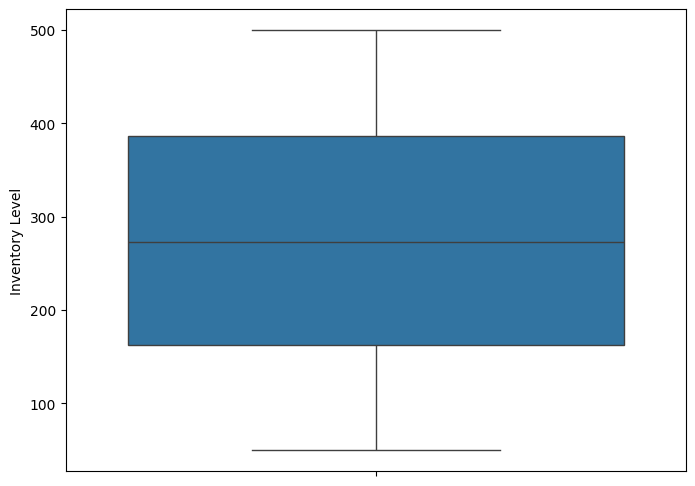

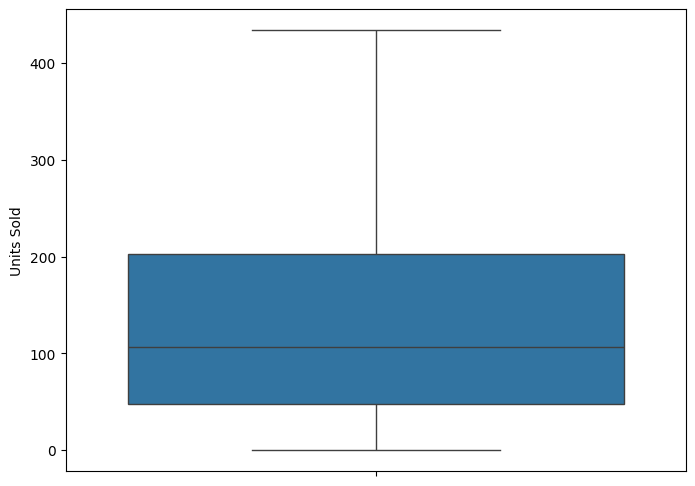

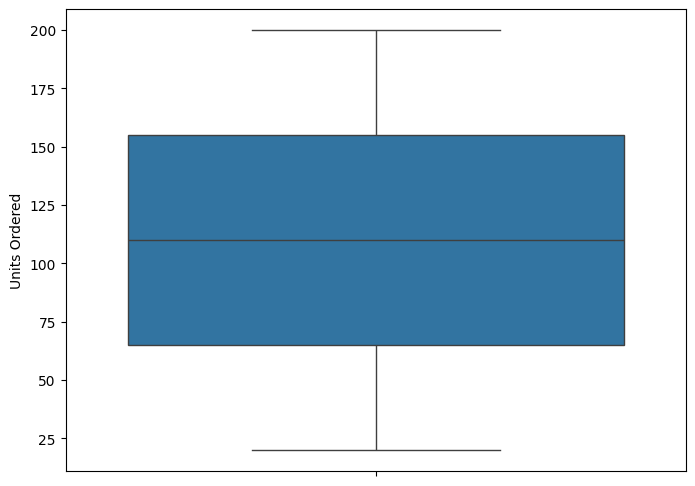

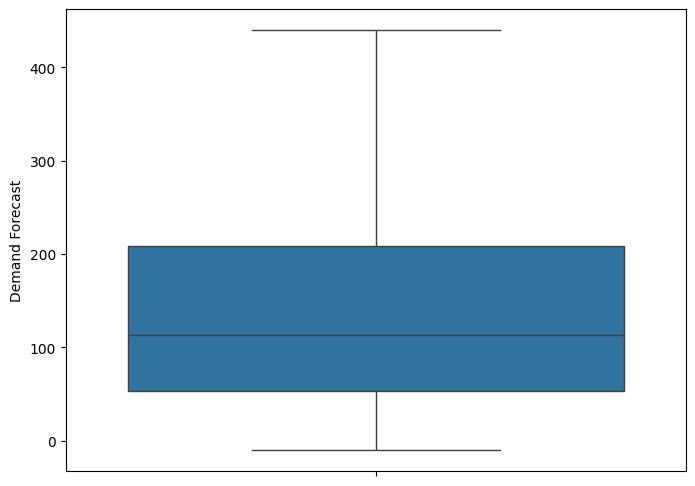

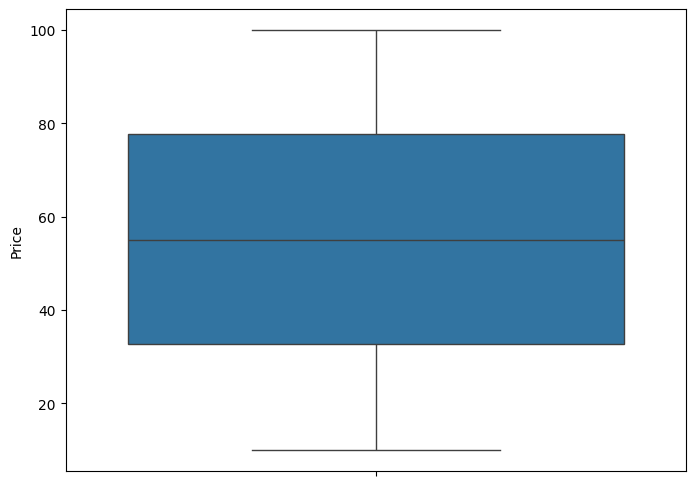

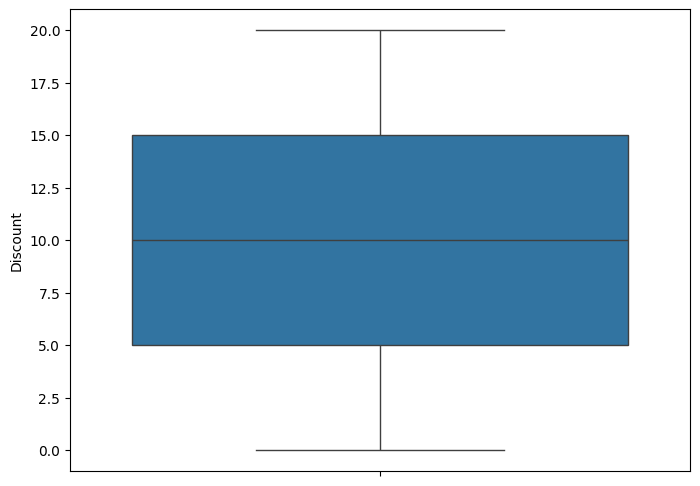

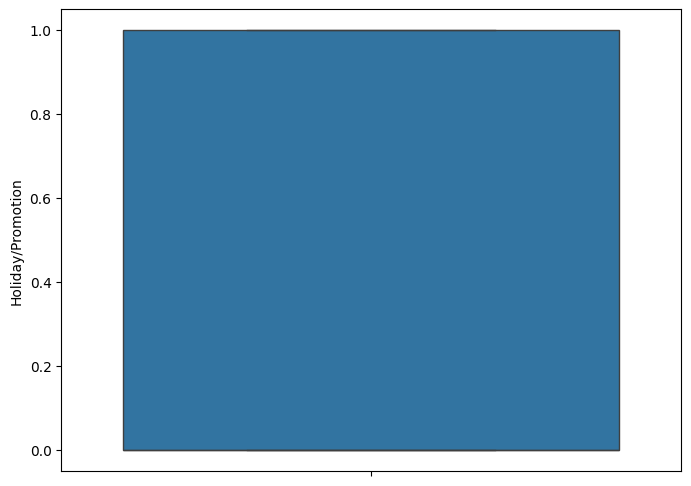

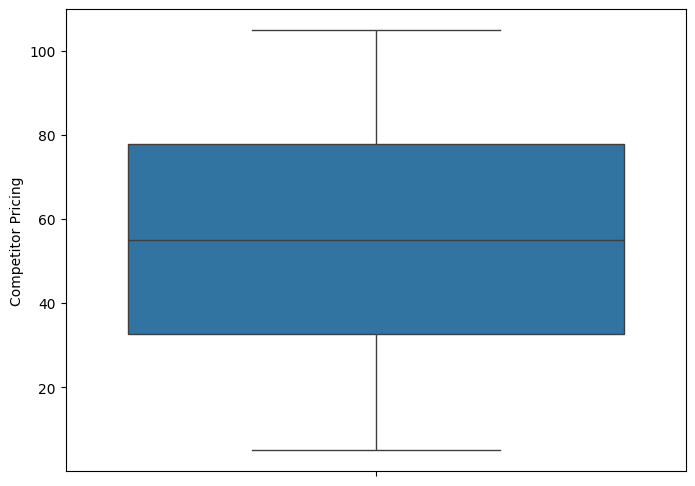

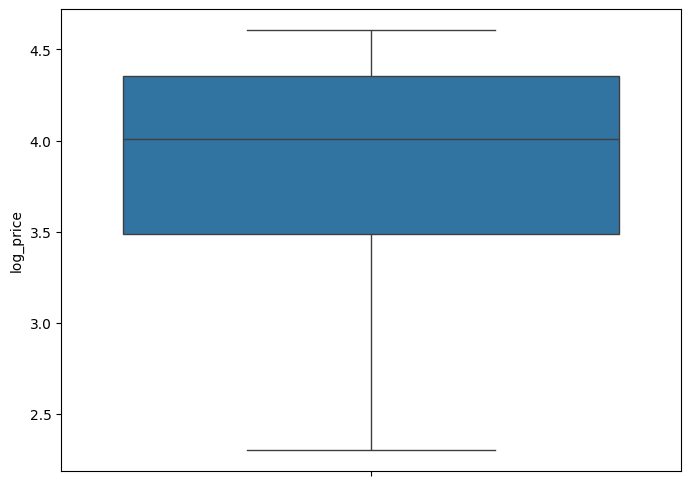

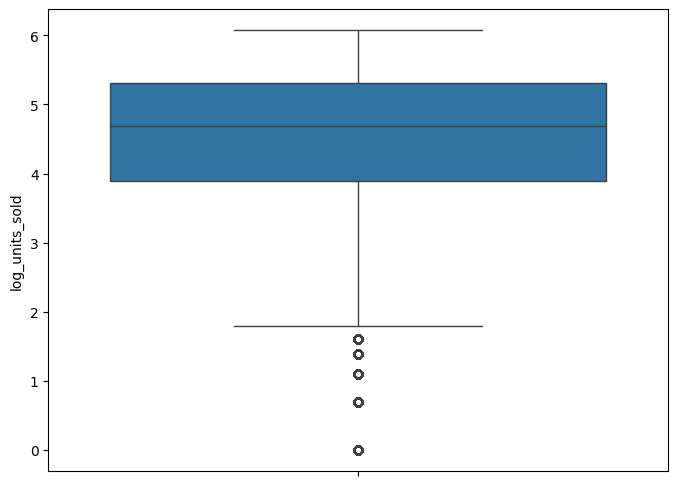

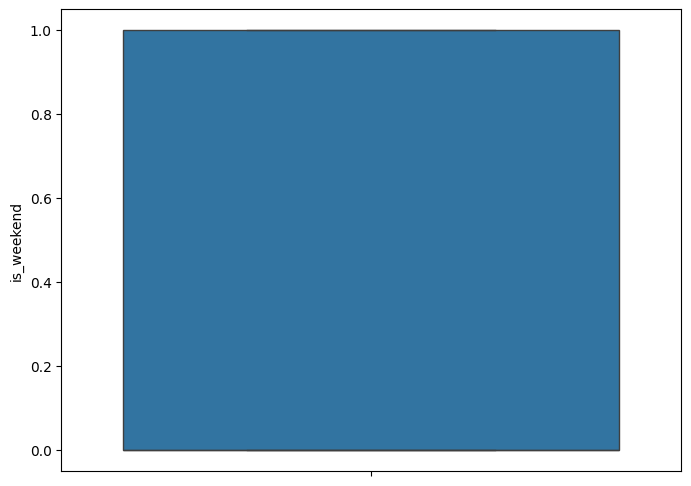

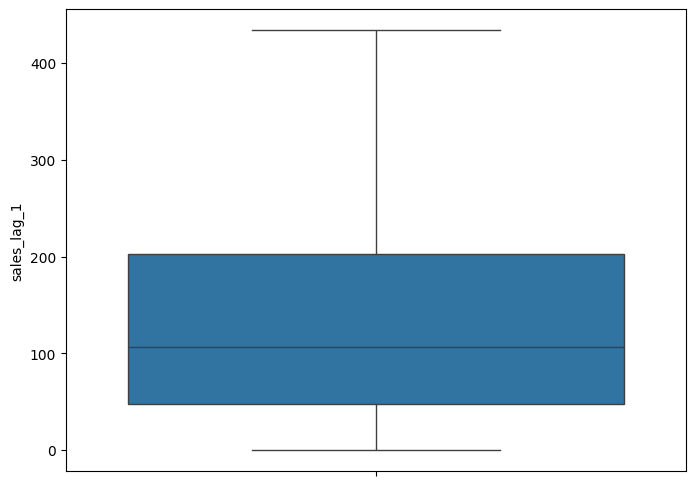

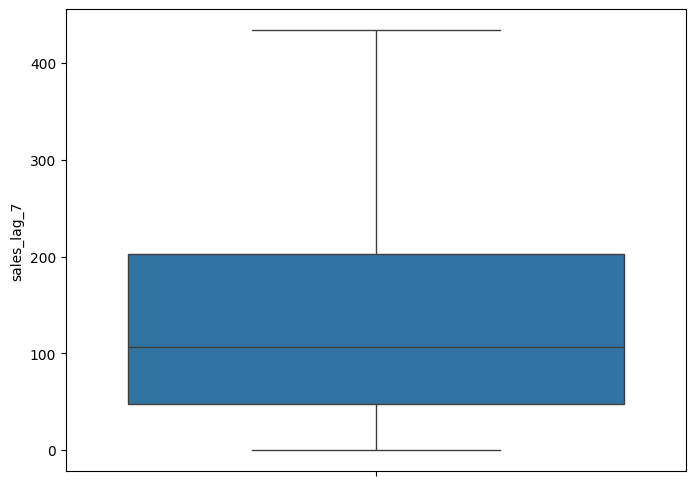

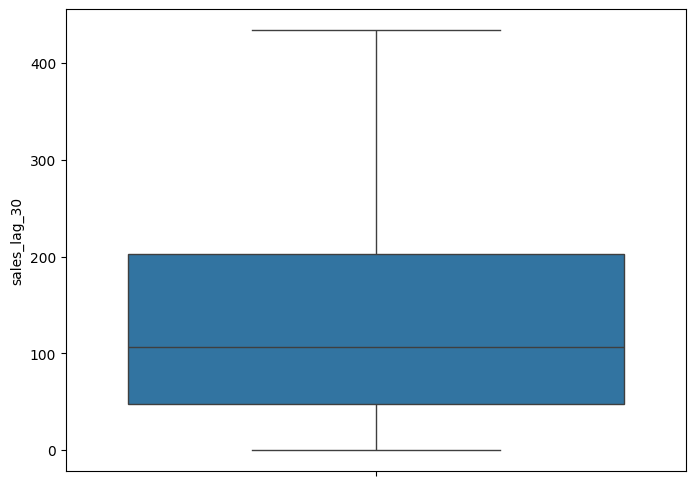

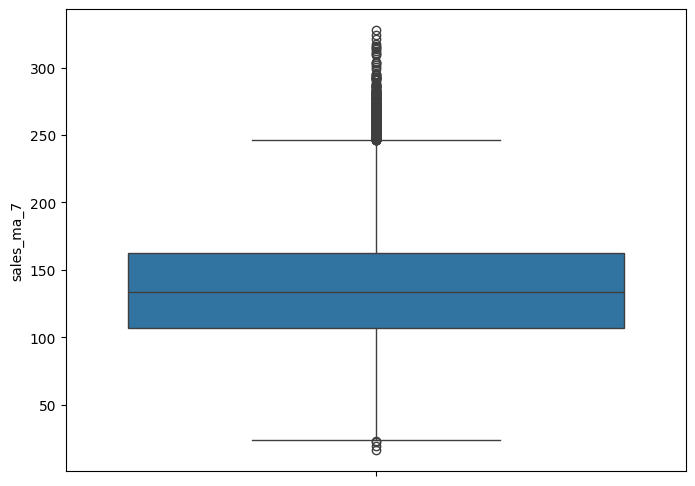

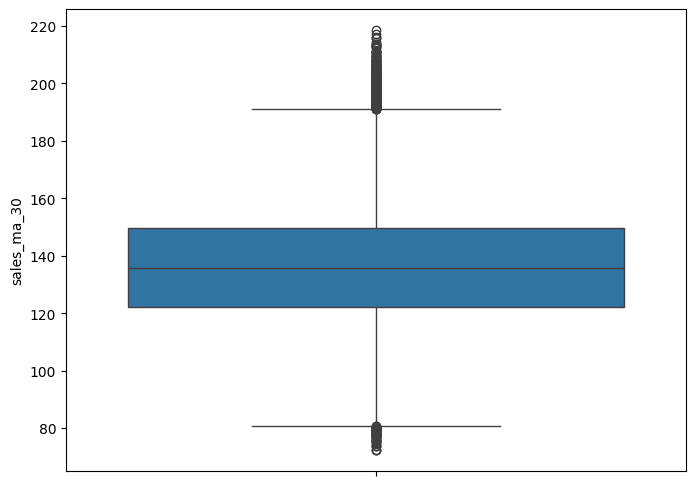

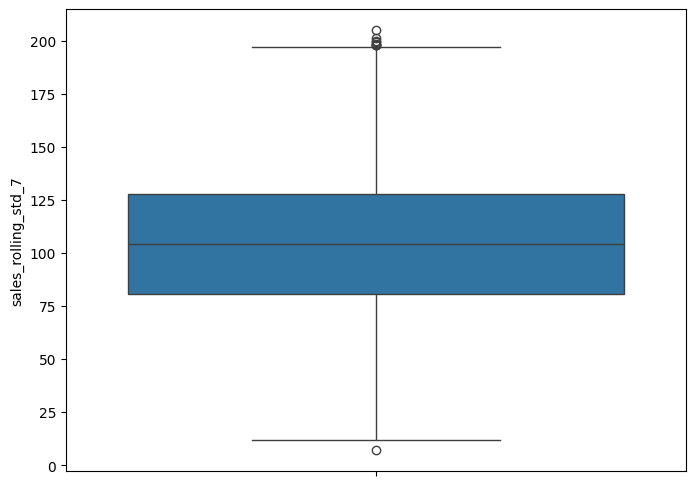

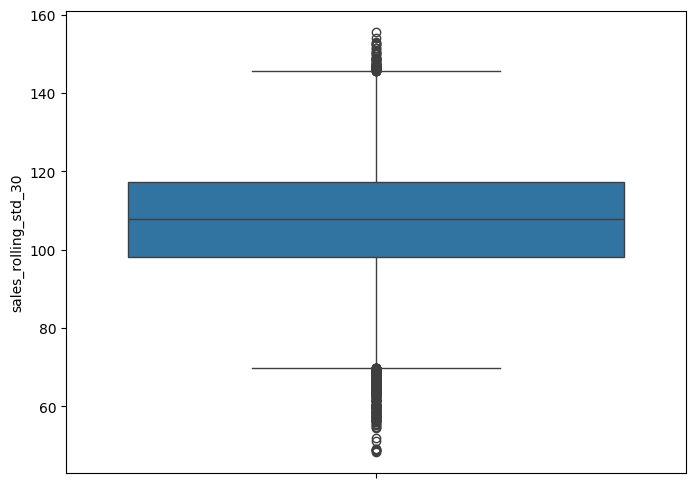

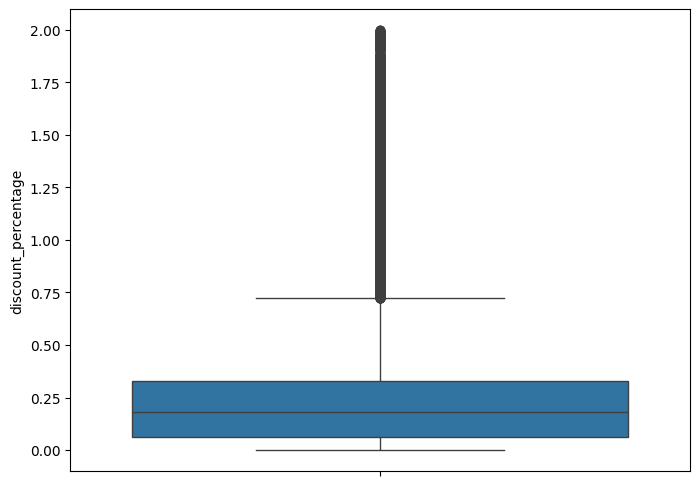

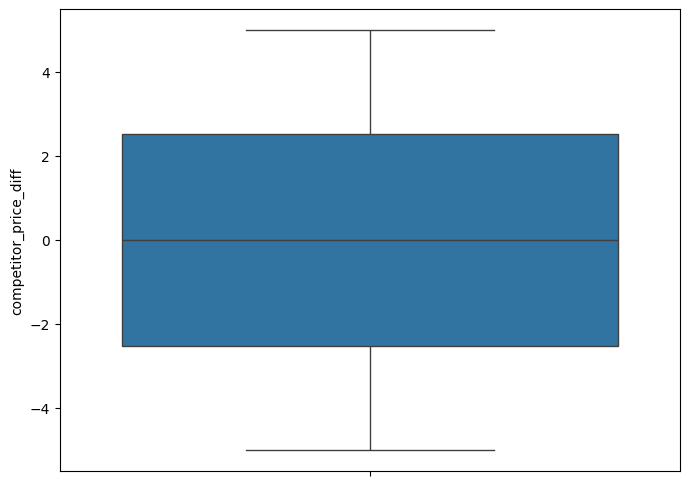

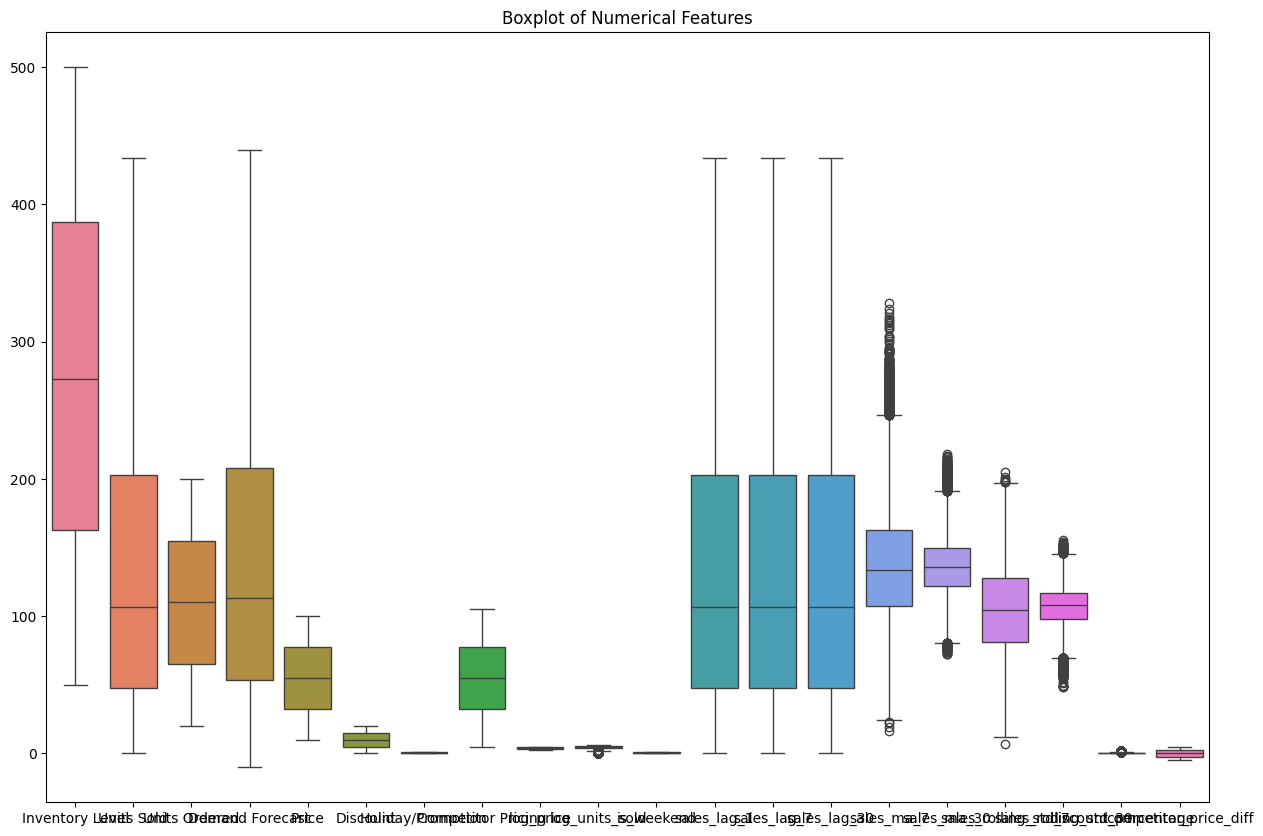

In [31]:
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()

           Date Store ID Product ID     Category Region  Inventory Level  \
3000 2022-01-31     S001      P0001     Clothing   West              410   
3100 2022-02-01     S001      P0001    Groceries   East              419   
3200 2022-02-02     S001      P0001  Electronics  South              415   
3300 2022-02-03     S001      P0001     Clothing  South              345   
3400 2022-02-04     S001      P0001    Furniture  South              121   

      Units Sold  Units Ordered  Demand Forecast  Price  ...  is_weekend  \
3000         200            152           212.24  70.78  ...           0   
3100         279             84           297.26  34.49  ...           0   
3200          38            149            53.13  52.49  ...           0   
3300          71            186            84.02  27.71  ...           0   
3400          25             25            37.72  16.84  ...           0   

     sales_lag_1  sales_lag_7  sales_lag_30  sales_ma_7 sales_ma_30  \
3000       130.

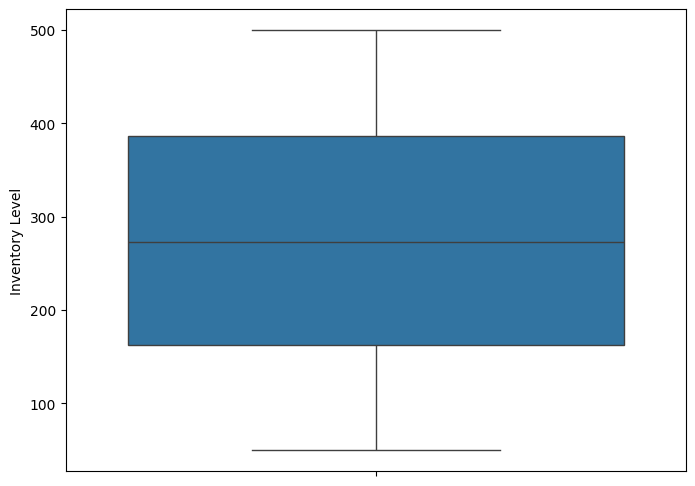

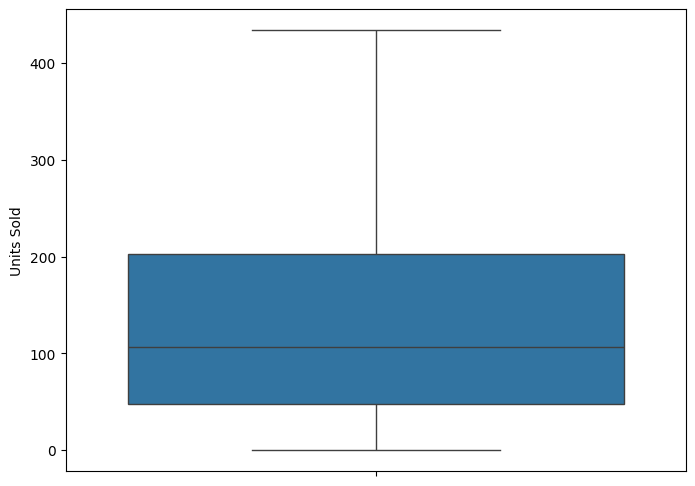

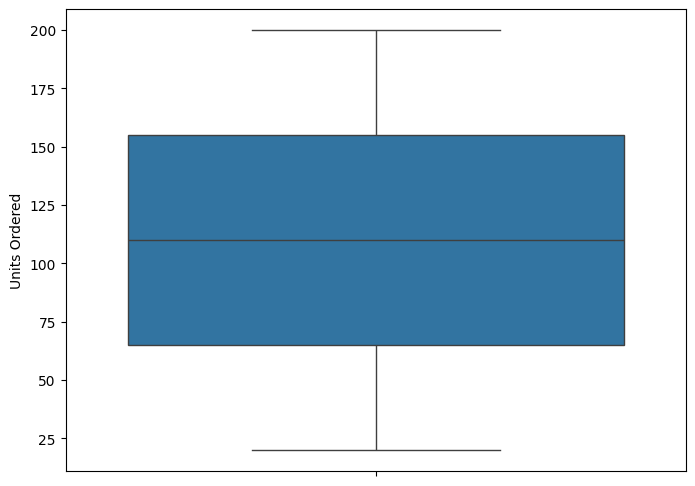

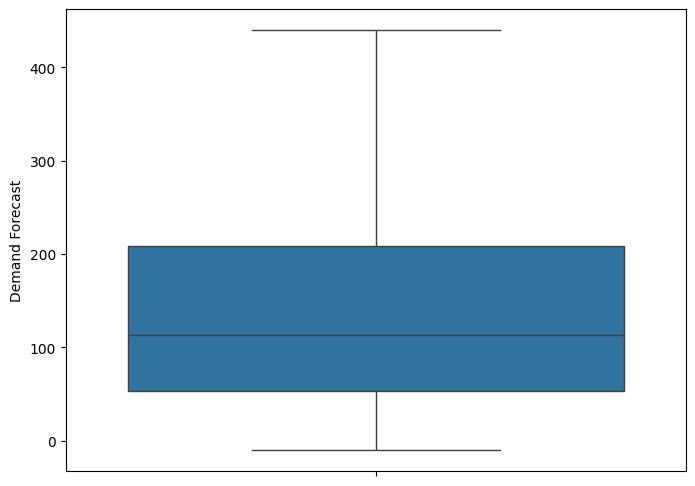

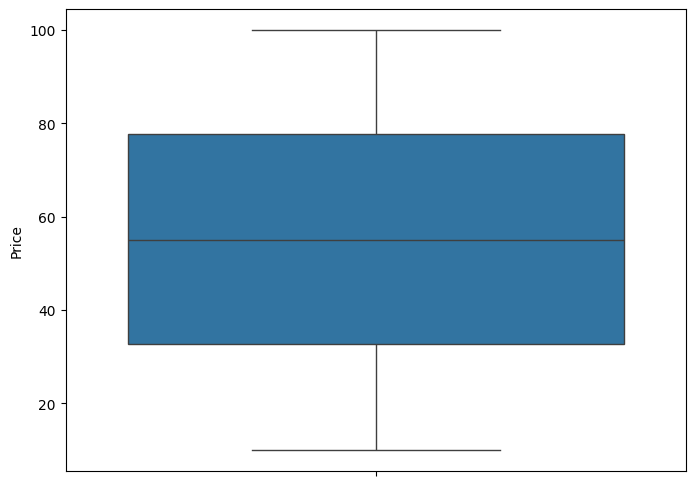

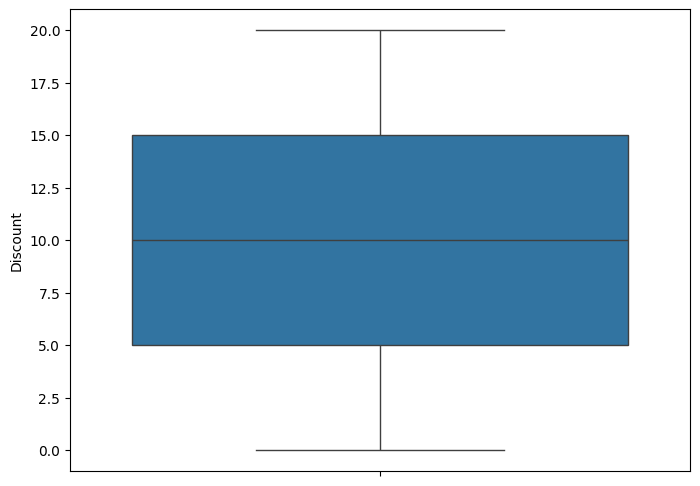

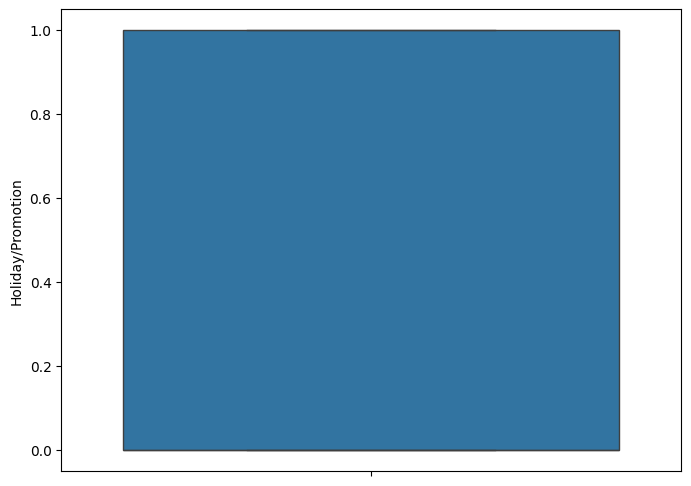

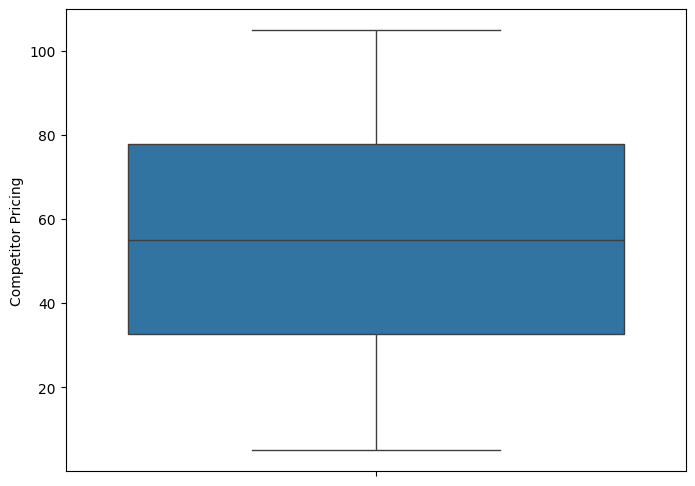

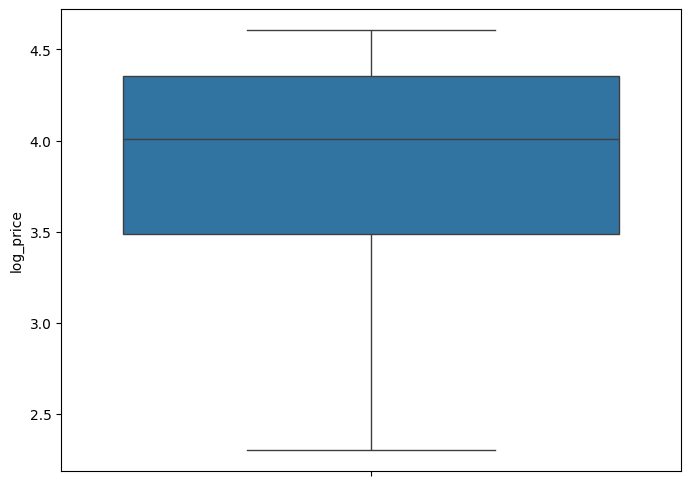

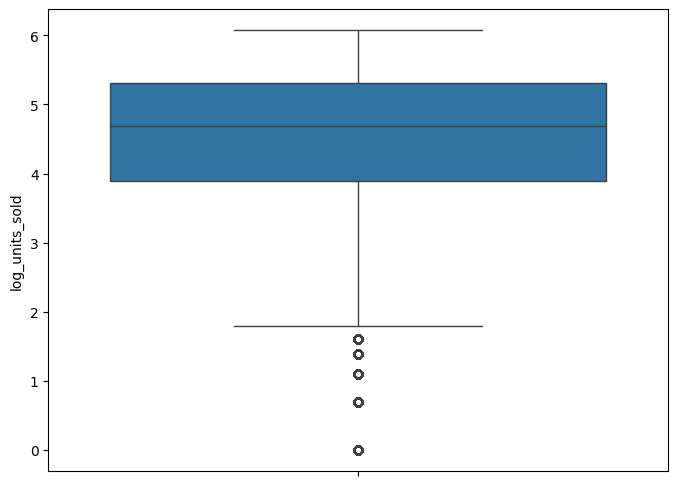

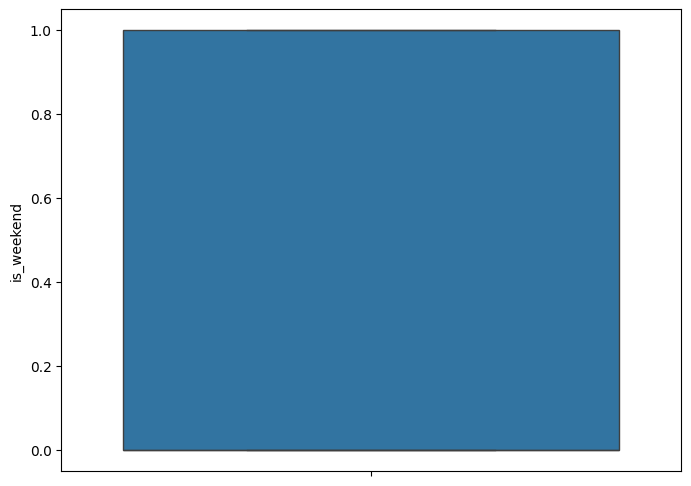

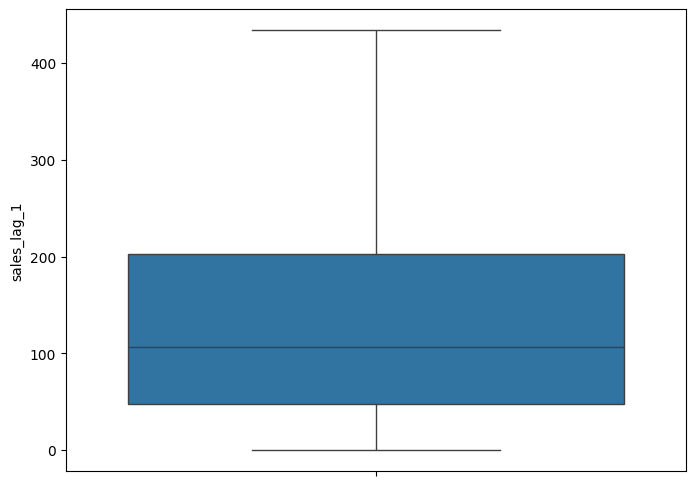

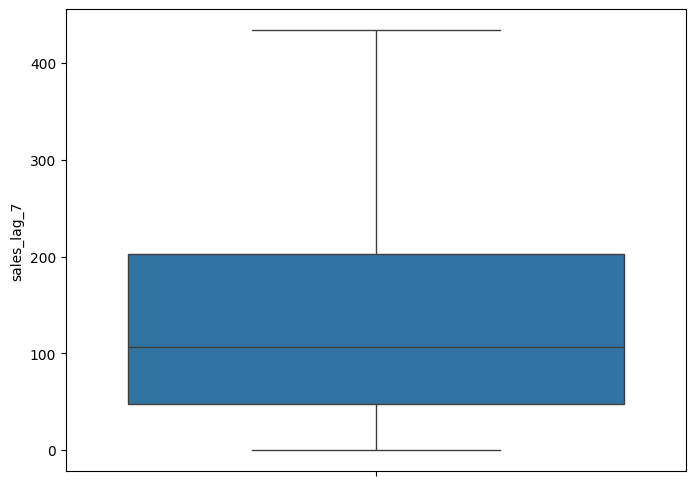

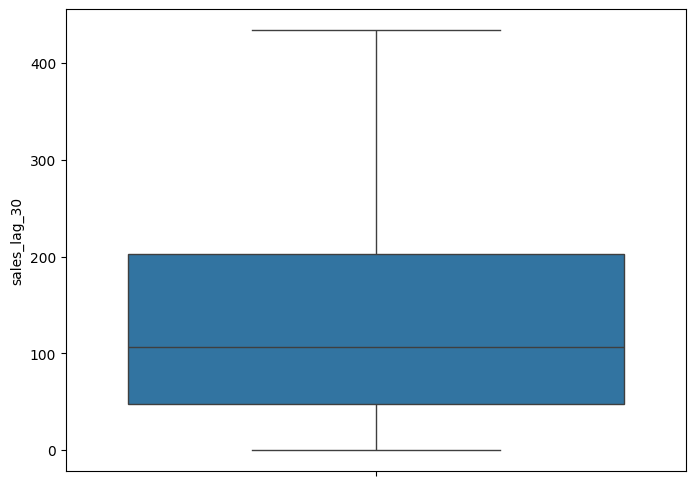

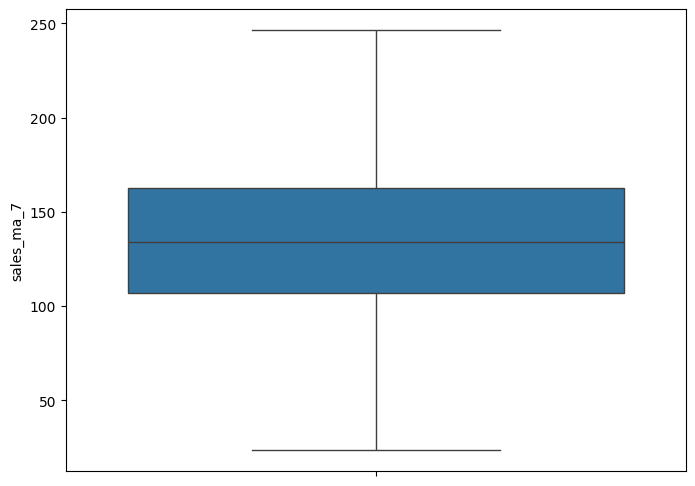

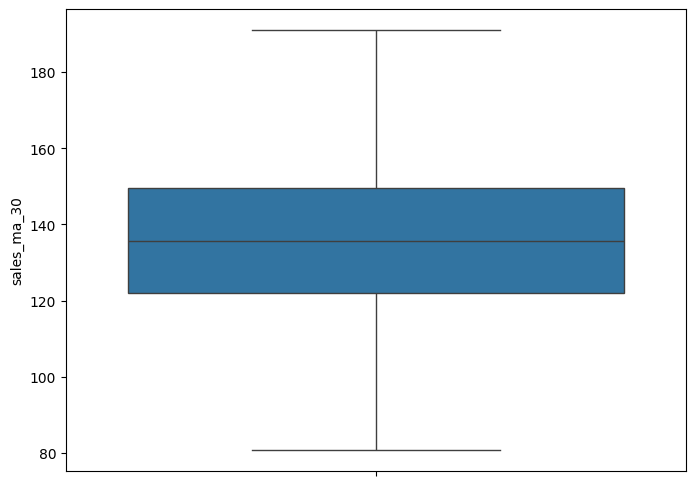

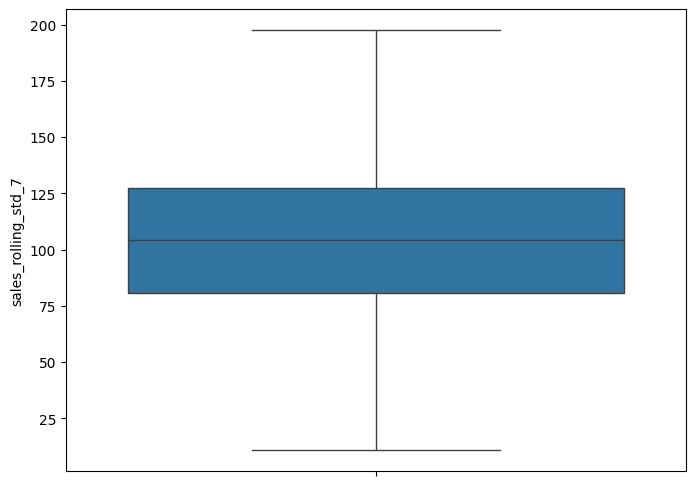

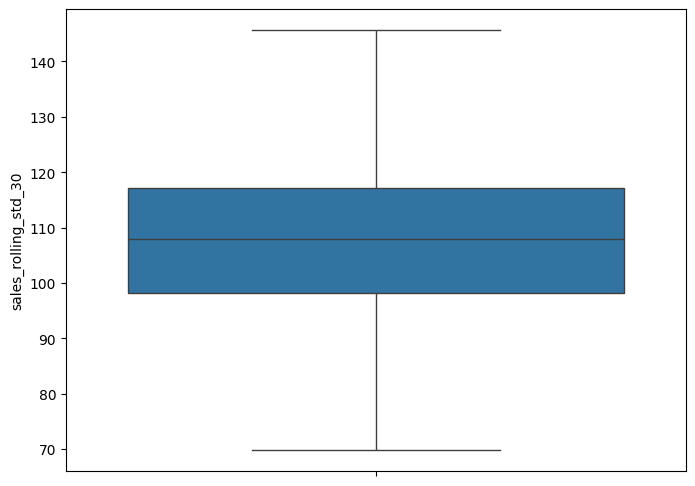

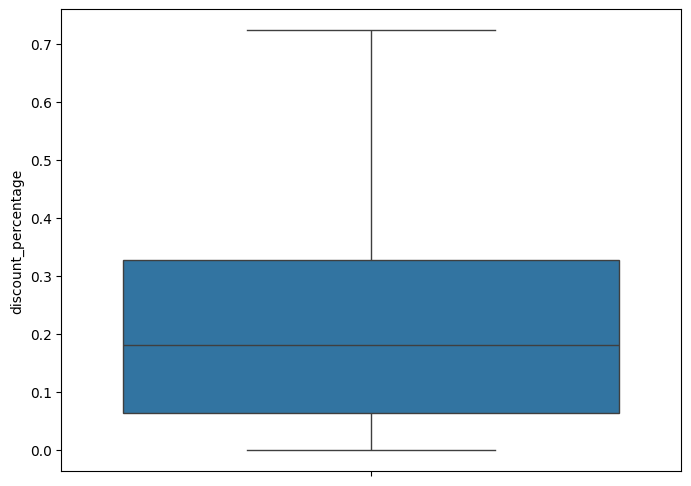

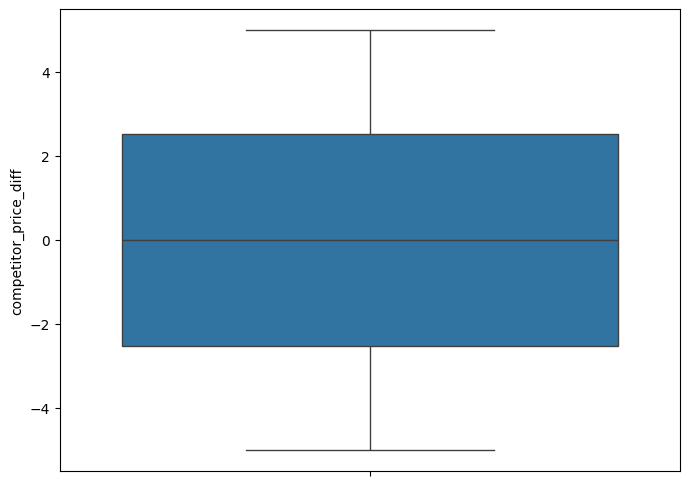

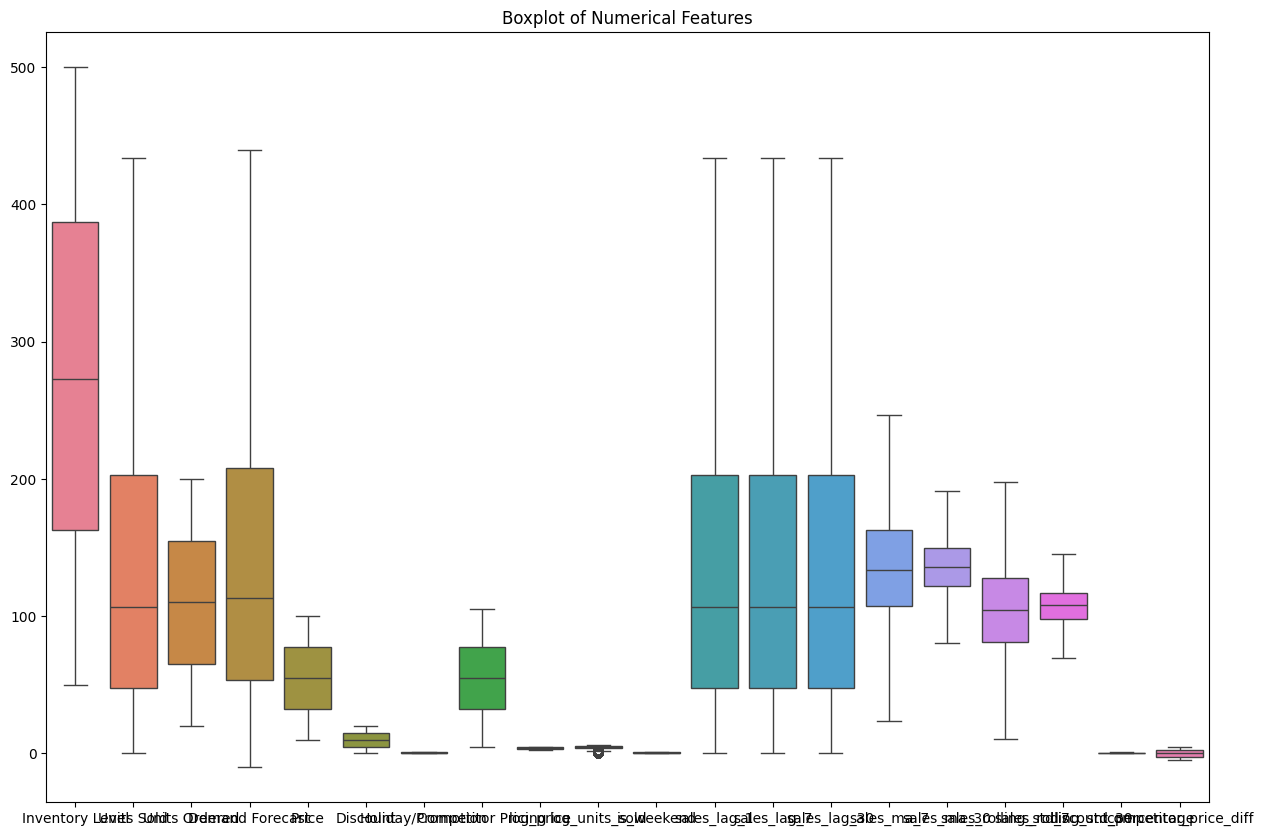

In [32]:
# Function to cap outliers using IQR (Interquartile Range)
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for acceptable values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper threshold
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List of columns from which to cap outliers
columns_to_cap_outliers = ["sales_lag_1", "sales_lag_7", "sales_lag_30","sales_ma_7","sales_ma_30","sales_rolling_std_7","sales_rolling_std_30","discount_percentage"]

# Assuming df_rename is your original DataFrame, apply the cap_outliers function
df_capped = cap_outliers(df, columns_to_cap_outliers)

# Display the first few rows of the capped DataFrame
print(df_capped.head())

# Generate individual boxplots for each column after capping outliers
for column in df_capped.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_capped[column])
    plt.show()

# Generate a combined boxplot for all selected columns after capping outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_capped.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()


In [33]:
import numpy as np

def handle_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median (or clip values within the range)
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),
                           df[feature].median(), df[feature])
    return df

# Apply to lag features
features = ["sales_lag_1", "sales_lag_7", "sales_lag_30","sales_ma_7","sales_ma_30","sales_rolling_std_7","sales_rolling_std_30"]
for feature in features:
    df_capped = handle_outliers_iqr(df_capped, feature)

print("Outliers handled using IQR method.")


Outliers handled using IQR method.


In [34]:
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

lag_features = ["sales_lag_1", "sales_lag_7", "sales_lag_30"]
# Apply to lag features

for feature in lag_features:
    df_capped = cap_outliers(df_capped, feature)

print("Outliers handled using capping.")


Outliers handled using capping.


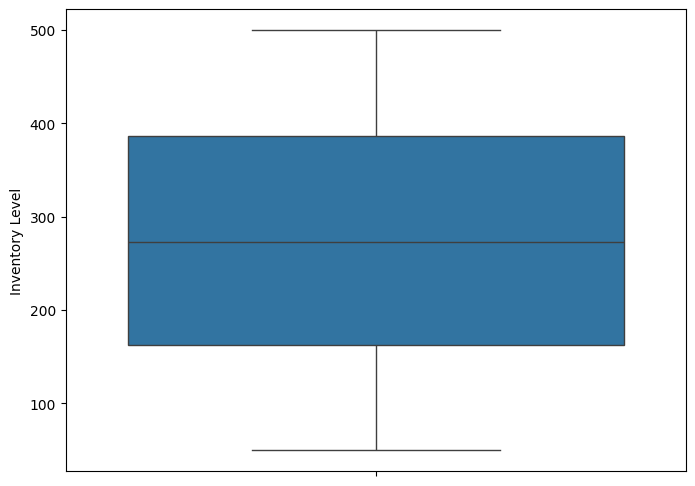

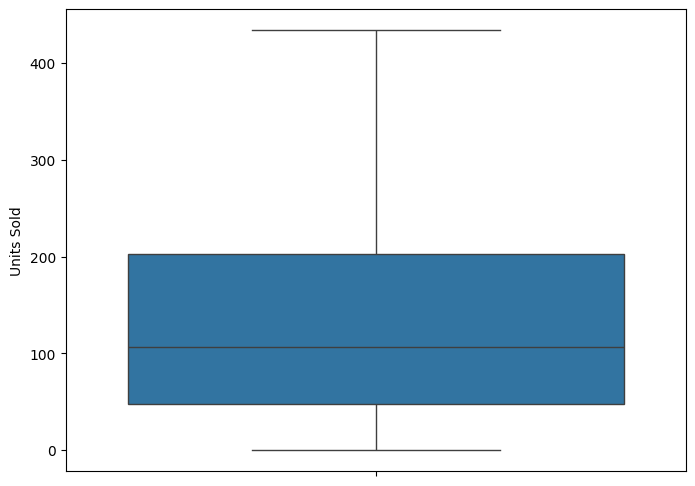

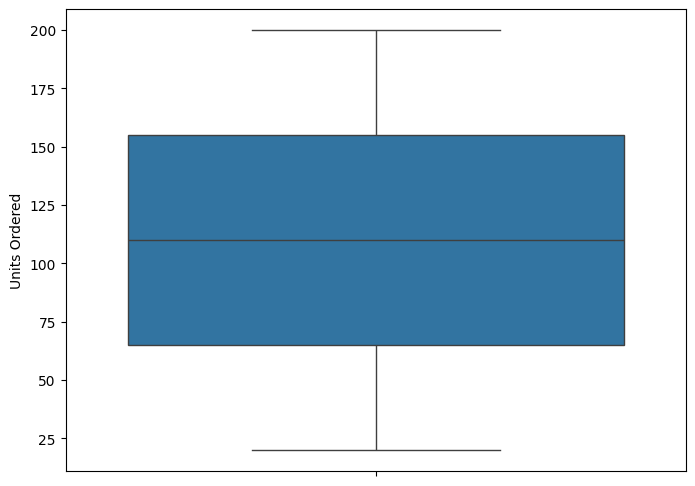

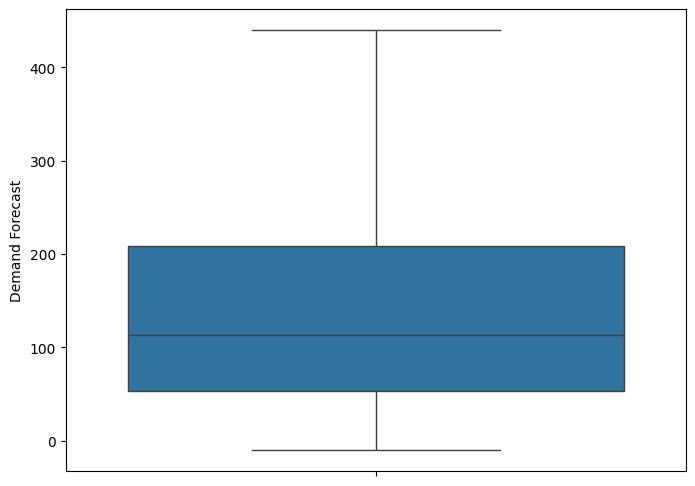

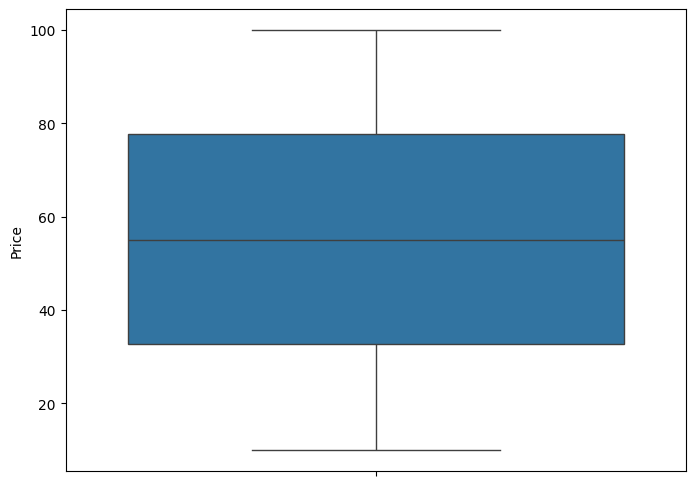

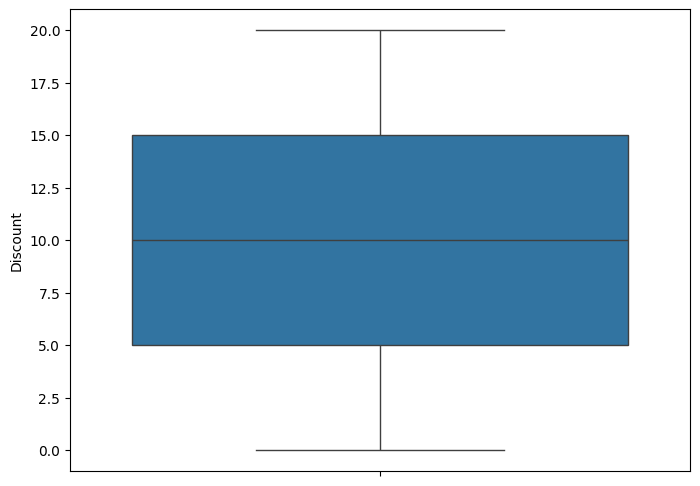

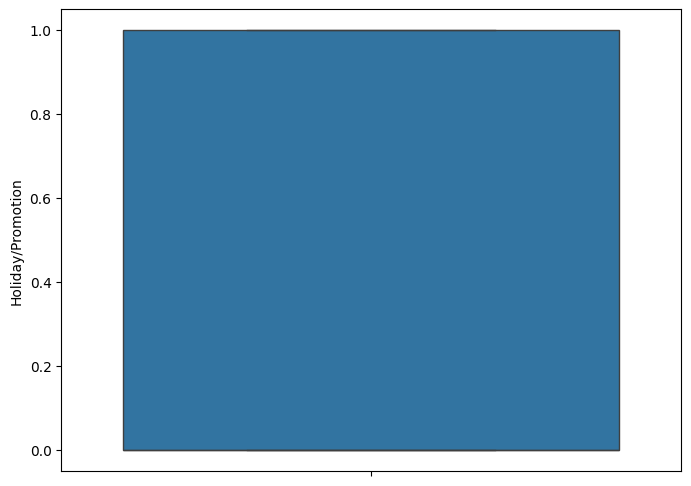

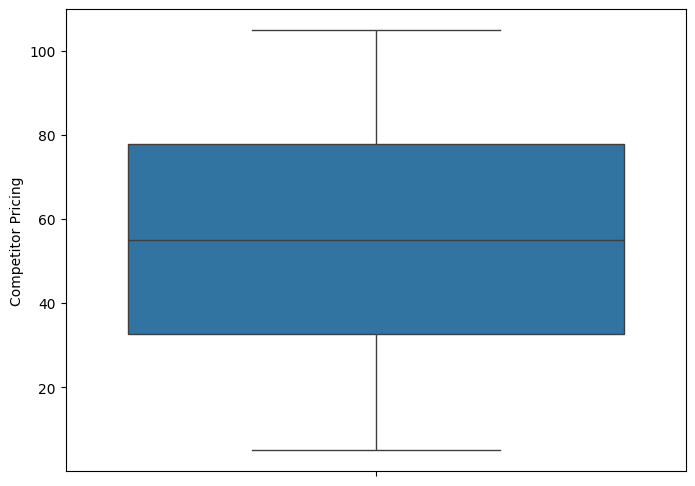

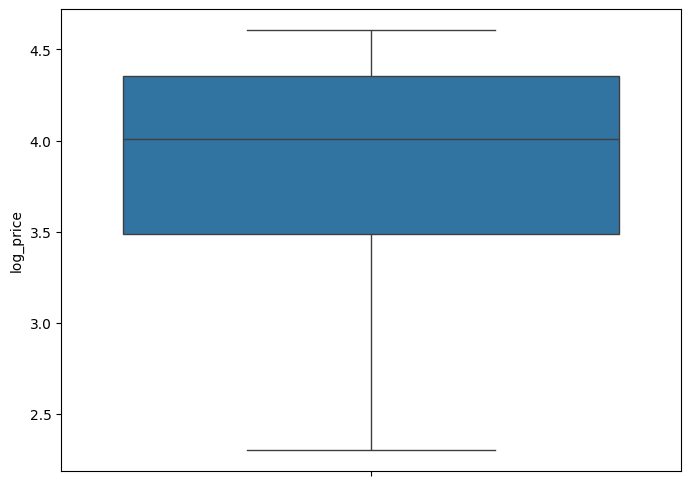

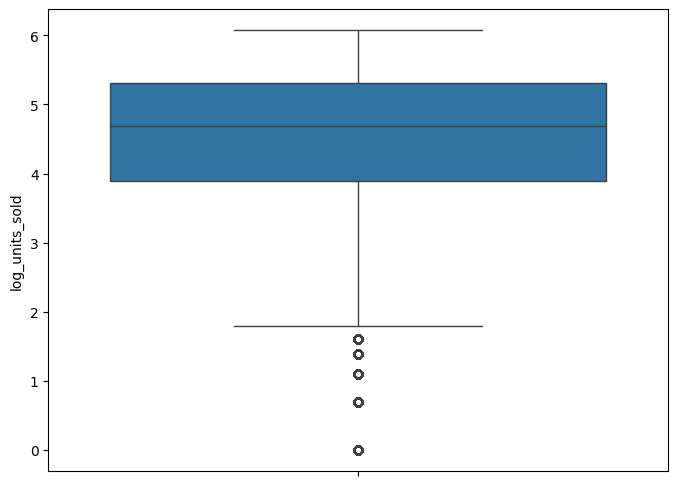

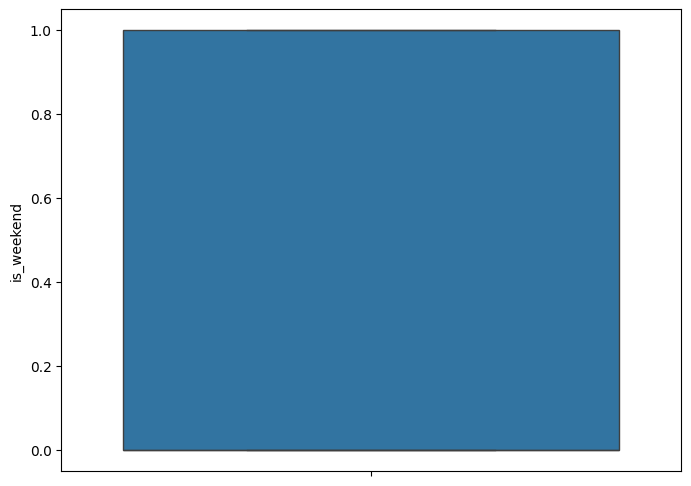

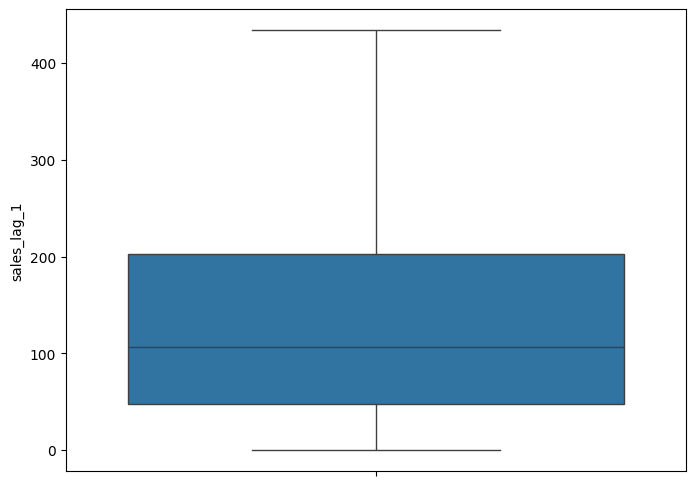

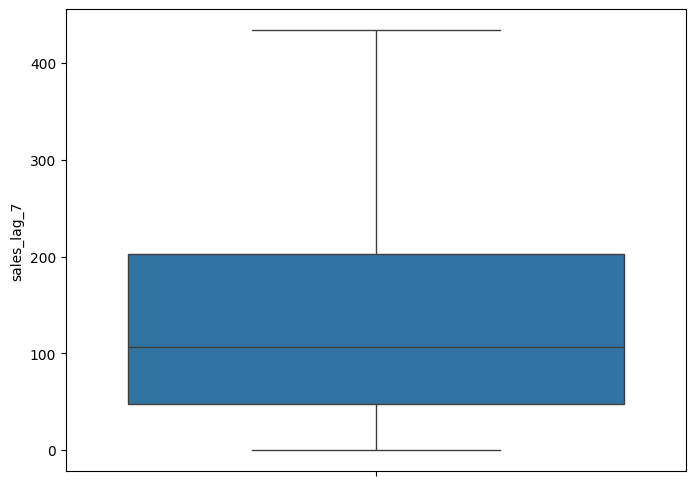

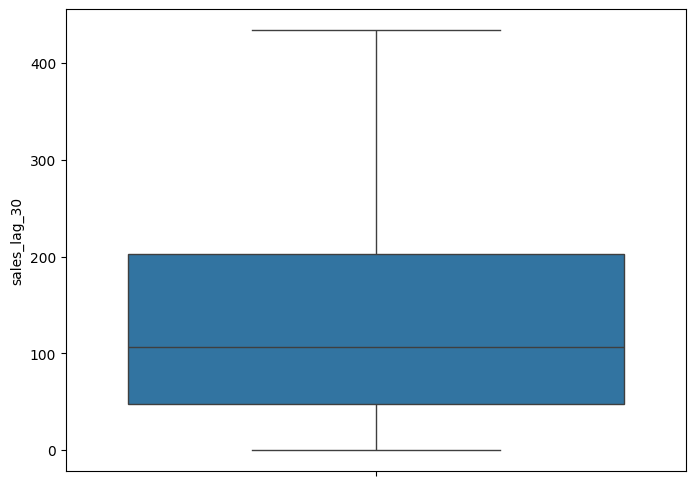

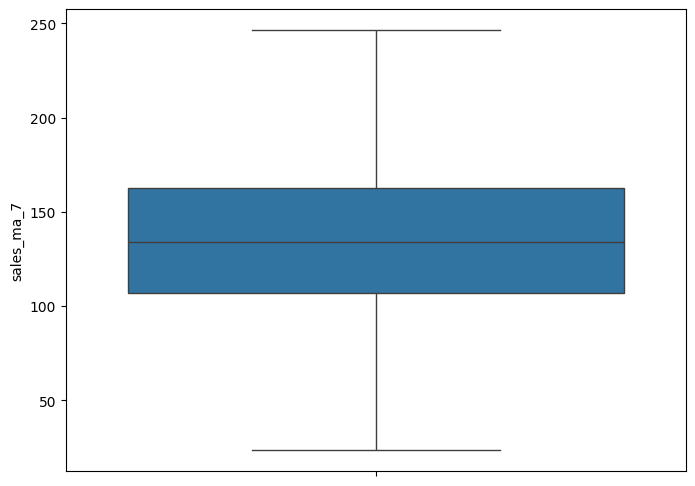

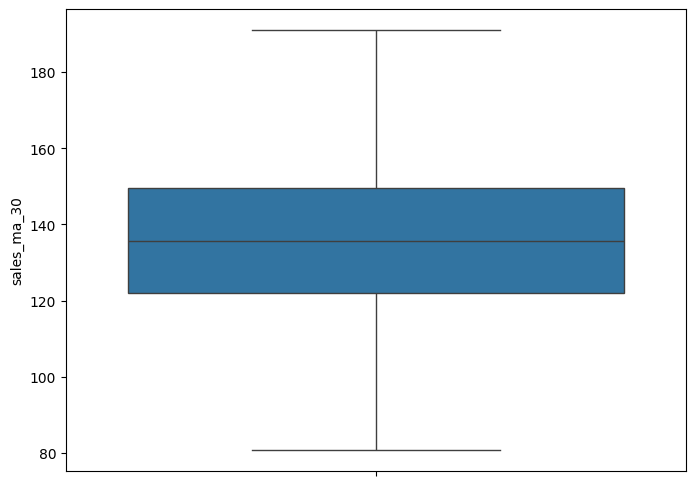

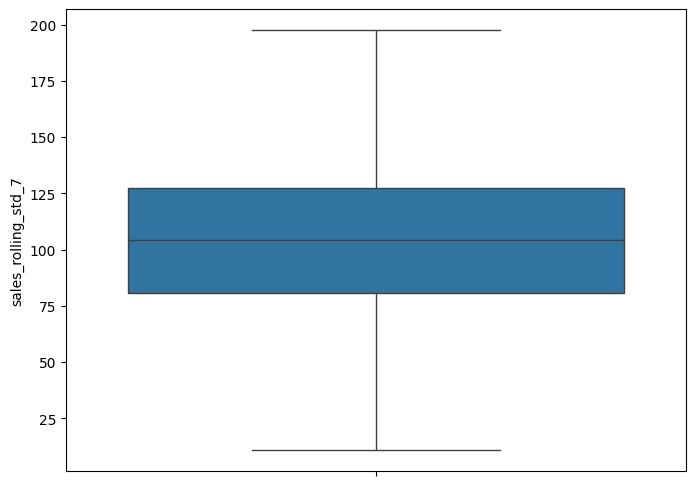

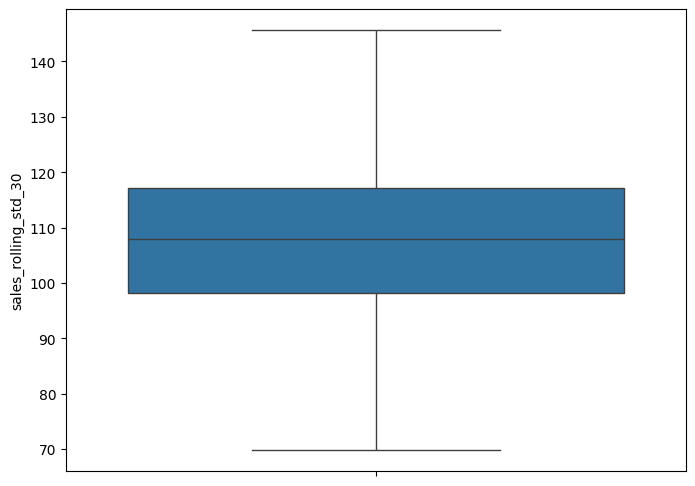

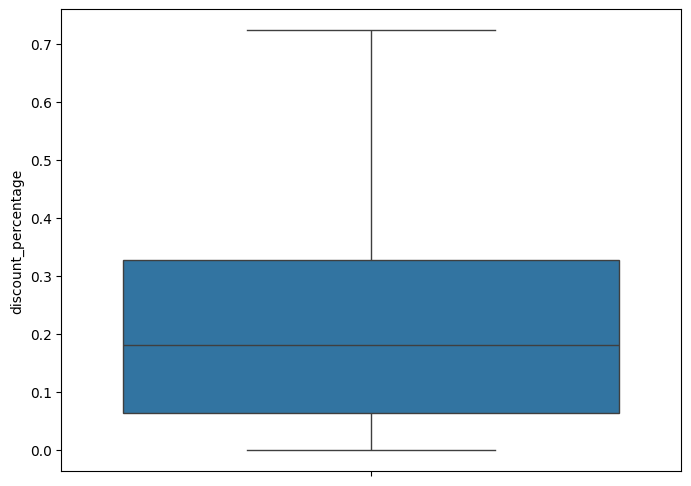

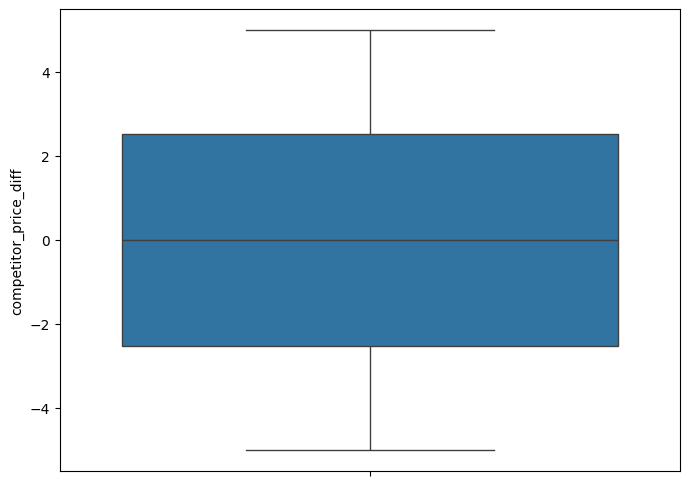

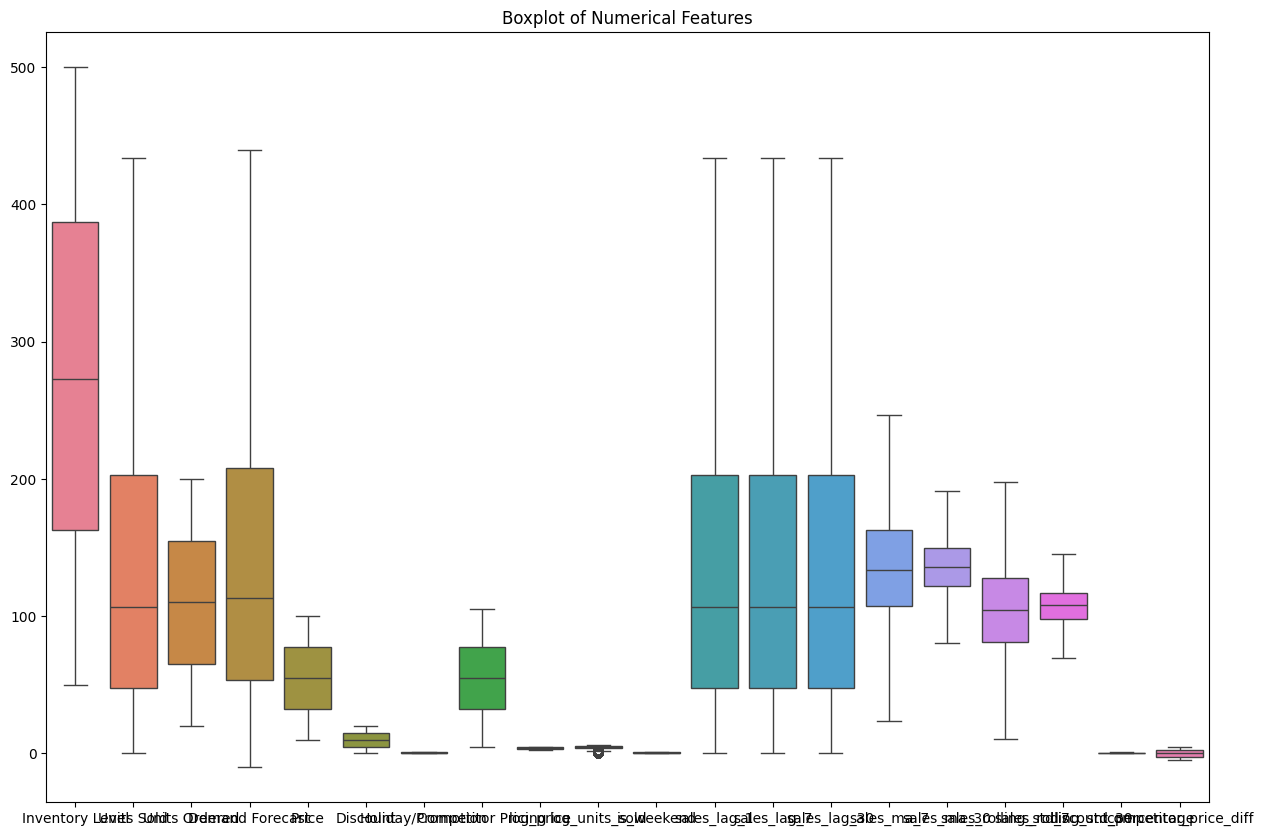

In [35]:
for column in df_capped.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_capped[column])
    plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_capped.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()

## 3. Scaling the numerical values

In [36]:
def apply_min_max_scaler(df, columns_to_scale):
    # """
    # Scales specified columns of a DataFrame using Min-Max Scaling.

    # Parameters:
    #     df (pd.DataFrame): The input DataFrame to scale.
    #     columns_to_scale (list): List of column names to apply Min-Max scaling.

    # Returns:
    #     pd.DataFrame: The DataFrame with scaled columns.
    # """
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd

    # Create a copy of the input DataFrame to preserve the original
    df_scaled = df.copy()

    # Initialize the scaler
    scaler = MinMaxScaler()

    # Apply scaling to each specified column
    for column in df.select_dtypes(include=['int64','float64']).columns:
        if column in df.columns:
            df_scaled[column] = scaler.fit_transform(df[[column]])
    return df_scaled

columns_to_scale = [df.select_dtypes(include=['int64','float64']).columns]
df_scaled = apply_min_max_scaler(df_capped, columns_to_scale)

df_scaled

ValueError: Input X contains infinity or a value too large for dtype('float64').

## 4. Label Encoding the categorical values

In [37]:
def Lebel_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    df_Encoded = df.copy()
    for column in df.select_dtypes(include=['object','category']).columns:


            encoder = LabelEncoder()
            df_Encoded[column] = encoder.fit_transform(df[column])
    return df_Encoded

df_encoded = Lebel_Encoding(df_scaled)
df_encoded

NameError: name 'df_scaled' is not defined

**Dropping unnecessary columns**

In [ ]:
# Drop non-numeric features for modeling
df_encoded = df_encoded.drop(columns=["Store ID", "Product ID"])
df_encoded

**Correlation Matrix**

In [ ]:
df_encoded.corr()

**Correlation Heatmap**

In [ ]:
#Calculate the correlation matrix for numerical features
corr_matrix = df_encoded.corr()

# Step 4: Generate a heatmap to visualize feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_encoded.to_csv("df_encoded.csv", index=False)

**Time Series Plotting**

In [ ]:
import matplotlib.pyplot as plt
#  Plot time-series data
plt.figure(figsize=(40, 5))
plt.plot(df_capped.tail(1000).index, df_capped.tail(1000)["Units Sold"], color="orangered", linewidth=1)

#  Add title and labels
plt.title("Time-Series Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Dependent Variable", fontsize=12)

#  Customize axes
plt.grid(True, linestyle="--", alpha=0.1)
plt.xticks(rotation=45)

#  Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#  Plot time-series data
plt.figure(figsize=(40, 5))
df_sampled = df_capped.tail(1000)  # Take every 100th row
plt.plot(df_sampled.index, df_sampled["Units Sold"], color="orangered", linewidth=1)

#  Add title and labels
plt.title("Time-Series Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Dependent Variable", fontsize=12)

#  Customize axes
plt.grid(True, linestyle="--", alpha=0.1)
plt.xticks(rotation=45)

#  Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
#  Plot time-series data
plt.figure(figsize=(40, 5))
plt.scatter(df_capped.tail(10000).index, df_capped.tail(10000)["Units Sold"], color="orangered", s=1, alpha=0.5)

#  Add title and labels
plt.title("Time-Series Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Dependent Variable", fontsize=12)

#  Customize axes
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

#  Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
#  Plot time-series data
plt.figure(figsize=(40, 5))
plt.plot(df_capped.tail(1000).index, df_capped.tail(1000)["Units Sold"], color="orangered", linewidth=1, alpha=0.5)


#  Add title and labels
plt.title("Time-Series Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Dependent Variable", fontsize=12)

#  Customize axes
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

#  Show the plot
plt.show()


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

# Automatically find optimal (p, d, q) for ARIMA
auto_arima_model = auto_arima(df_encoded["Units Sold"], seasonal=True, m=12, trace=True)
print(auto_arima_model.summary())

## 5. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def train_test_splitting(df, target_column):
    df = df.sort_values(by="Date")  # Ensure data is sorted by time

    # Separate features (X) and target (y)
    X = df.drop(columns=[target_column, "Date"])  # Drop target and Date
    y = df[target_column]

    # Split dataset (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test


## 6. Model Train

*   ARIMA
*   XGBoost
*   LSTM



In [38]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Print first 10 actual vs. predicted values
    results_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
    print("\n First 10 Actual vs Predicted Values:")
    print(results_df.head(10))

# Function to train selected models
def train_model(X_train, X_test, y_train, y_test, model_name):
    if model_name == "ARIMA":
        print("\n Training ARIMA Model...")
        p, d, q = auto_arima_model.order
        model = ARIMA(y_train, order=(p, d, q)).fit()
        y_pred = model.forecast(steps=len(y_test))

    elif model_name == "SARIMA":
        print("\n Training SARIMA Model...")
        p, d, q = auto_arima_model.order
        model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(1, 1, 1, 12)).fit()
        y_pred = model.forecast(steps=len(y_test))

    elif model_name == "XGBoost":
        print("\n Training XGBoost Model...")
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, enable_categorical = True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    elif model_name == "RandomForest":
        print("\n Training Random Forest Regressor...")
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    elif model_name == "LSTM":
        print("\n Training LSTM Model...")

        # Scale features
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Reshape for LSTM (samples, time steps, features)
        X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

        # Define LSTM model
        model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
            Dropout(0.2),
            LSTM(50, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)
        y_pred = model.predict(X_test_lstm).flatten()

    elif model_name == "Hybrid_ARIMA_LSTM":
        print("\n Training Hybrid ARIMA + LSTM Model...")

        # Step 1: Train ARIMA on training data
        p, d, q = auto_arima(y_train, seasonal=False).order
        arima_model = ARIMA(y_train, order=(p, d, q)).fit()

        # Step 2: Get ARIMA predictions
        arima_pred_train = arima_model.fittedvalues  # ARIMA fitted values on training set
        arima_pred_test = arima_model.forecast(steps=len(y_test))  # ARIMA forecast on test set

        # Step 3: Calculate residuals (errors)
        residuals_train = y_train - arima_pred_train

        # Step 4: Train LSTM on residuals
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

        lstm_model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
            Dropout(0.2),
            LSTM(50, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ])

        lstm_model.compile(optimizer='adam', loss='mse')
        lstm_model.fit(X_train_lstm, residuals_train, epochs=50, batch_size=32, verbose=0)

        # Step 5: Predict residuals using LSTM
        lstm_pred_test = lstm_model.predict(X_test_lstm).flatten()

        # Step 6: Final Prediction = ARIMA Prediction + LSTM Residual Prediction
        y_pred = arima_pred_test + lstm_pred_test

    else:
        print(f" Error: {model_name} is not a valid model name.")
        return None, None

    evaluate_model(y_test, y_pred, model_name)
    return model, y_pred

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_splitting(df_encoded, target_column="Units Sold")

# Choose model and train
arima_model, arima_pred = train_model(X_train, X_test, y_train, y_test, model_name="ARIMA")
sarima_model, sarima_pred = train_model(X_train, X_test, y_train, y_test, model_name="SARIMA")
xgb_model, xgb_pred = train_model(X_train, X_test, y_train, y_test, model_name="XGBoost")
rf_model, rf_pred = train_model(X_train, X_test, y_train, y_test, model_name="RandomForest")
lstm_model, lstm_pred = train_model(X_train, X_test, y_train, y_test, model_name="LSTM")
hybrid_model, hybrid_pred = train_model(X_train, X_test, y_train, y_test, model_name="Hybrid_ARIMA_LSTM")

NameError: name 'train_test_splitting' is not defined

## 7. Hyperparameter Tuning

In [ ]:
###

## 8. X-AI

In [40]:
import lime
import lime.lime_tabular
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import shap

import xgboost as xgb
from lime import lime_tabular

**SHAP Force Plot**

In [41]:
shap.initjs()
# Create the SHAP explainer and calculate SHAP values
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0,:], X_train.iloc[0,:])

NameError: name 'rf_model' is not defined

**SHAP Count Plot**

In [ ]:
# Create the SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# You can also create a detailed SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')

**LIME Tabular Plot**

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

# Choose a test sample to explain (Index 10 as an example)
sample_index = 10
exp = explainer.explain_instance(X_test.iloc[sample_index].values, rf_model.predict, num_features=5)

# Display the LIME Table Plot
exp.show_in_notebook(show_table=True)